# Data Analysis for Excellente Corp (Braze Case Study)
---

## Data Overview
---

In [13]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Braze Data Analysis") \
    .getOrCreate()

25/04/05 04:59:34 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [1]:
tables = [
    "USERS_BEHAVIORS_APP_SESSIONEND.csv",
    "USERS_MESSAGES_PUSHNOTIFICATION_SEND.csv",
    "USERS_BEHAVIORS_APP_SESSIONSTART.csv",
    "USERS_MESSAGES_EMAIL_SEND.csv",
    "USERS_MESSAGES_EMAIL_DELIVERY.csv",
    "USERS_CAMPAIGNS_CONVERSION.csv",
    "USERS_MESSAGES_EMAIL_OPEN.csv",
    "USERS_BEHAVIORS_PURCHASE.csv",
    "USERS_BEHAVIORS_APP_FIRSTSESSION.csv",
    "USERS_MESSAGES_CONTENTCARD_SEND.csv",
    "USERS_CANVAS_CONVERSION.csv",
    "USERS_MESSAGES_INAPPMESSAGE_IMPRESSION.csv",
    "USERS_CANVAS_EXPERIMENTSTEP_CONVERSION.csv",
    "USERS_MESSAGES_PUSHNOTIFICATION_OPEN.csv",
    "USERS_MESSAGES_INAPPMESSAGE_CLICK.csv",
    "USERS_BEHAVIORS_SUBSCRIPTIONGROUP_STATECHANGE.csv",
    "USERS_BEHAVIORS_SUBSCRIPTIONGROUP_GLOBALSTATECHANGE.csv",
    "USERS_MESSAGES_WHATSAPP_SEND.csv",
    "USERS_MESSAGES_WHATSAPP_DELIVERY.csv",
    "USERS_MESSAGES_EMAIL_CLICK.csv",
    "USERS_MESSAGES_CONTENTCARD_CLICK.csv",
    "USERS_MESSAGES_SMS_SEND.csv",
    "USERS_MESSAGES_SMS_DELIVERY.csv",
    "USERS_MESSAGES_EMAIL_UNSUBSCRIBE.csv",
    "USERS_MESSAGES_SMS_SHORTLINKCLICK.csv",
    "CANVAS_STEP.csv",
    "TAGS_VIEW.csv",
    "WORKFLOWS_VIEW.csv",
    "CAMPAIGNS_VIEW.csv",
    "APP_GROUPS_VIEW.csv"
]

for file in tables:
    print(f"\n --- {file} ---")
    path = f"gs://brazecase-data/{file}"
    try:
        df = spark.read.option("header", True).csv(path)
        df.printSchema()
        df.show(5, truncate=False)
    except Exception as e:
        print(f" Failed to read {file}: {e}")


 --- USERS_BEHAVIORS_APP_SESSIONEND.csv ---


root
 |-- USER_ID: string (nullable = true)
 |-- TIME: string (nullable = true)
 |-- DEVICE_ID: string (nullable = true)
 |-- PLATFORM: string (nullable = true)
 |-- APP_GROUP_ID: string (nullable = true)



+----------------------------------------------------------------+----------+----------------------------------------------------------------+--------+--------------------+
|USER_ID                                                         |TIME      |DEVICE_ID                                                       |PLATFORM|APP_GROUP_ID        |
+----------------------------------------------------------------+----------+----------------------------------------------------------------+--------+--------------------+
|f0558ca60048443a0486ed4e08fd033ad74a05a99e4cc4776340f31676c937eb|1738299055|3d0f5735188ca9999ed9beec783084153f476fde56242ef4c441bbd9ad3a22a8|ios     |67d8beaa788702c9d17b|
|f0558ca60048443a0486ed4e08fd033ad74a05a99e4cc4776340f31676c937eb|1722724159|3d0f5735188ca9999ed9beec783084153f476fde56242ef4c441bbd9ad3a22a8|ios     |67d8beaa788702c9d17b|
|f0558ca60048443a0486ed4e08fd033ad74a05a99e4cc4776340f31676c937eb|1738299059|3d0f5735188ca9999ed9beec783084153f476fde56242ef4c441bbd9ad

In [3]:
from pyspark.sql import functions as F
import os

base_path = "gs://brazecase-data/"

file_list = [
    "USERS_BEHAVIORS_APP_SESSIONEND.csv",
    "USERS_MESSAGES_PUSHNOTIFICATION_SEND.csv",
    "USERS_BEHAVIORS_APP_SESSIONSTART.csv",
    "USERS_MESSAGES_EMAIL_SEND.csv",
    "USERS_MESSAGES_EMAIL_DELIVERY.csv",
    "USERS_CAMPAIGNS_CONVERSION.csv",
    "USERS_MESSAGES_EMAIL_OPEN.csv",
    "USERS_BEHAVIORS_PURCHASE.csv",
    "USERS_BEHAVIORS_APP_FIRSTSESSION.csv",
    "USERS_MESSAGES_CONTENTCARD_SEND.csv",
    "USERS_CANVAS_CONVERSION.csv",
    "USERS_MESSAGES_INAPPMESSAGE_IMPRESSION.csv",
    "USERS_CANVAS_EXPERIMENTSTEP_CONVERSION.csv",
    "USERS_MESSAGES_PUSHNOTIFICATION_OPEN.csv",
    "USERS_MESSAGES_INAPPMESSAGE_CLICK.csv",
    "USERS_BEHAVIORS_SUBSCRIPTIONGROUP_STATECHANGE.csv",
    "USERS_BEHAVIORS_SUBSCRIPTIONGROUP_GLOBALSTATECHANGE.csv",
    "USERS_MESSAGES_WHATSAPP_SEND.csv",
    "USERS_MESSAGES_WHATSAPP_DELIVERY.csv",
    "USERS_MESSAGES_EMAIL_CLICK.csv",
    "USERS_MESSAGES_CONTENTCARD_CLICK.csv",
    "USERS_MESSAGES_SMS_SEND.csv",
    "USERS_MESSAGES_SMS_DELIVERY.csv",
    "USERS_MESSAGES_EMAIL_UNSUBSCRIBE.csv",
    "USERS_MESSAGES_SMS_SHORTLINKCLICK.csv",
    "CANVAS_STEP.csv",
    "TAGS_VIEW.csv",
    "WORKFLOWS_VIEW.csv",
    "CAMPAIGNS_VIEW.csv",
    "APP_GROUPS_VIEW.csv"
]

def compute_null_proportions(df):
    total_count = df.count()
    return (
        df.select([(F.count(F.when(F.col(c).isNull(), c)) / total_count).alias(c) for c in df.columns])
        .toPandas()
        .T
        .reset_index()
        .rename(columns={'index': 'Column_Name', 0: 'Proportion_of_Nulls'})
        .sort_values(by="Proportion_of_Nulls", ascending=False)
    )

null_reports = {}

for file in file_list:
    table_name = os.path.splitext(file)[0]
    full_path = os.path.join(base_path, file)
    df = spark.read.csv(full_path, header=True, inferSchema=True)
    null_report = compute_null_proportions(df)
    null_reports[table_name] = null_report


In [6]:
print("=== USERS_BEHAVIORS_APP_SESSIONEND ===")
print(null_reports['USERS_BEHAVIORS_APP_SESSIONEND'])

print("\n=== USERS_MESSAGES_PUSHNOTIFICATION_SEND ===")
print(null_reports['USERS_MESSAGES_PUSHNOTIFICATION_SEND'])

print("\n=== USERS_BEHAVIORS_APP_SESSIONSTART ===")
print(null_reports['USERS_BEHAVIORS_APP_SESSIONSTART'])

print("\n=== USERS_MESSAGES_EMAIL_SEND ===")
print(null_reports['USERS_MESSAGES_EMAIL_SEND'])

print("\n=== USERS_MESSAGES_EMAIL_DELIVERY ===")
print(null_reports['USERS_MESSAGES_EMAIL_DELIVERY'])

print("\n=== USERS_CAMPAIGNS_CONVERSION ===")
print(null_reports['USERS_CAMPAIGNS_CONVERSION'])

print("\n=== USERS_MESSAGES_EMAIL_OPEN ===")
print(null_reports['USERS_MESSAGES_EMAIL_OPEN'])

print("\n=== USERS_BEHAVIORS_PURCHASE ===")
print(null_reports['USERS_BEHAVIORS_PURCHASE'])

print("\n=== USERS_BEHAVIORS_APP_FIRSTSESSION ===")
print(null_reports['USERS_BEHAVIORS_APP_FIRSTSESSION'])

print("\n=== USERS_MESSAGES_CONTENTCARD_SEND ===")
print(null_reports['USERS_MESSAGES_CONTENTCARD_SEND'])

print("\n=== USERS_CANVAS_CONVERSION ===")
print(null_reports['USERS_CANVAS_CONVERSION'])

print("\n=== USERS_MESSAGES_INAPPMESSAGE_IMPRESSION ===")
print(null_reports['USERS_MESSAGES_INAPPMESSAGE_IMPRESSION'])

print("\n=== USERS_CANVAS_EXPERIMENTSTEP_CONVERSION ===")
print(null_reports['USERS_CANVAS_EXPERIMENTSTEP_CONVERSION'])

print("\n=== USERS_MESSAGES_PUSHNOTIFICATION_OPEN ===")
print(null_reports['USERS_MESSAGES_PUSHNOTIFICATION_OPEN'])

print("\n=== USERS_MESSAGES_INAPPMESSAGE_CLICK ===")
print(null_reports['USERS_MESSAGES_INAPPMESSAGE_CLICK'])

print("\n=== USERS_BEHAVIORS_SUBSCRIPTIONGROUP_STATECHANGE ===")
print(null_reports['USERS_BEHAVIORS_SUBSCRIPTIONGROUP_STATECHANGE'])

print("\n=== USERS_BEHAVIORS_SUBSCRIPTIONGROUP_GLOBALSTATECHANGE ===")
print(null_reports['USERS_BEHAVIORS_SUBSCRIPTIONGROUP_GLOBALSTATECHANGE'])

print("\n=== USERS_MESSAGES_WHATSAPP_SEND ===")
print(null_reports['USERS_MESSAGES_WHATSAPP_SEND'])

print("\n=== USERS_MESSAGES_WHATSAPP_DELIVERY ===")
print(null_reports['USERS_MESSAGES_WHATSAPP_DELIVERY'])

print("\n=== USERS_MESSAGES_EMAIL_CLICK ===")
print(null_reports['USERS_MESSAGES_EMAIL_CLICK'])

print("\n=== USERS_MESSAGES_CONTENTCARD_CLICK ===")
print(null_reports['USERS_MESSAGES_CONTENTCARD_CLICK'])

print("\n=== USERS_MESSAGES_SMS_SEND ===")
print(null_reports['USERS_MESSAGES_SMS_SEND'])

print("\n=== USERS_MESSAGES_SMS_DELIVERY ===")
print(null_reports['USERS_MESSAGES_SMS_DELIVERY'])

print("\n=== USERS_MESSAGES_EMAIL_UNSUBSCRIBE ===")
print(null_reports['USERS_MESSAGES_EMAIL_UNSUBSCRIBE'])

print("\n=== USERS_MESSAGES_SMS_SHORTLINKCLICK ===")
print(null_reports['USERS_MESSAGES_SMS_SHORTLINKCLICK'])

print("\n=== CANVAS_STEP ===")
print(null_reports['CANVAS_STEP'])

print("\n=== TAGS_VIEW ===")
print(null_reports['TAGS_VIEW'])

print("\n=== WORKFLOWS_VIEW ===")
print(null_reports['WORKFLOWS_VIEW'])

print("\n=== CAMPAIGNS_VIEW ===")
print(null_reports['CAMPAIGNS_VIEW'])

print("\n=== APP_GROUPS_VIEW ===")
print(null_reports['APP_GROUPS_VIEW'])

=== USERS_BEHAVIORS_APP_SESSIONEND ===
    Column_Name  Proportion_of_Nulls
0       USER_ID                  0.0
1          TIME                  0.0
2     DEVICE_ID                  0.0
3      PLATFORM                  0.0
4  APP_GROUP_ID                  0.0

=== USERS_MESSAGES_PUSHNOTIFICATION_SEND ===
      Column_Name  Proportion_of_Nulls
3     CAMPAIGN_ID         5.314172e-01
4       CANVAS_ID         4.695331e-01
6  CANVAS_STEP_ID         4.695331e-01
5         COUNTRY         8.420014e-03
7     DISPATCH_ID         1.068077e-08
8    APP_GROUP_ID         1.068077e-08
0         USER_ID         0.000000e+00
1            TIME         0.000000e+00
2       DEVICE_ID         0.000000e+00

=== USERS_BEHAVIORS_APP_SESSIONSTART ===
    Column_Name  Proportion_of_Nulls
0       USER_ID                  0.0
1          TIME                  0.0
2     DEVICE_ID                  0.0
3      PLATFORM                  0.0
4  APP_GROUP_ID                  0.0

=== USERS_MESSAGES_EMAIL_SEND ===
    

In [3]:
from pyspark.sql import functions as F

tables_with_time = [
    "USERS_BEHAVIORS_APP_SESSIONEND",
    "USERS_MESSAGES_PUSHNOTIFICATION_SEND",
    "USERS_BEHAVIORS_APP_SESSIONSTART",
    "USERS_MESSAGES_EMAIL_SEND",
    "USERS_MESSAGES_EMAIL_DELIVERY",
    "USERS_CAMPAIGNS_CONVERSION",
    "USERS_MESSAGES_EMAIL_OPEN",
    "USERS_BEHAVIORS_PURCHASE",
    "USERS_BEHAVIORS_APP_FIRSTSESSION",
    "USERS_MESSAGES_CONTENTCARD_SEND",
    "USERS_CANVAS_CONVERSION",
    "USERS_MESSAGES_INAPPMESSAGE_IMPRESSION",
    "USERS_CANVAS_EXPERIMENTSTEP_CONVERSION",
    "USERS_MESSAGES_PUSHNOTIFICATION_OPEN",
    "USERS_MESSAGES_INAPPMESSAGE_CLICK",
    "USERS_BEHAVIORS_SUBSCRIPTIONGROUP_STATECHANGE",
    "USERS_BEHAVIORS_SUBSCRIPTIONGROUP_GLOBALSTATECHANGE",
    "USERS_MESSAGES_WHATSAPP_SEND",
    "USERS_MESSAGES_WHATSAPP_DELIVERY",
    "USERS_MESSAGES_EMAIL_CLICK",
    "USERS_MESSAGES_CONTENTCARD_CLICK",
    "USERS_MESSAGES_SMS_SEND",
    "USERS_MESSAGES_SMS_DELIVERY",
    "USERS_MESSAGES_EMAIL_UNSUBSCRIBE",
    "USERS_MESSAGES_SMS_SHORTLINKCLICK"
]

def get_latest_time(table_name):
    df = spark.read.option("header", True).csv(f"gs://brazecase-data/{table_name}.csv")
    
    df = df.withColumn("TIME", F.from_unixtime(F.col("TIME")).cast("timestamp"))
    
    latest_date = df.agg(F.max("TIME").alias("LATEST_DATE"))
    
    print(f"Latest Date for {table_name}:")
    latest_date.show(truncate=False)

for table in tables_with_time:
    get_latest_time(table)


Latest Date for USERS_BEHAVIORS_APP_SESSIONEND:


+-------------------+
|LATEST_DATE        |
+-------------------+
|2025-02-28 23:59:59|
+-------------------+

Latest Date for USERS_MESSAGES_PUSHNOTIFICATION_SEND:


+-------------------+
|LATEST_DATE        |
+-------------------+
|2025-02-28 23:59:41|
+-------------------+

Latest Date for USERS_BEHAVIORS_APP_SESSIONSTART:


+-------------------+
|LATEST_DATE        |
+-------------------+
|2025-02-28 23:59:59|
+-------------------+

Latest Date for USERS_MESSAGES_EMAIL_SEND:


+-------------------+
|LATEST_DATE        |
+-------------------+
|2025-02-28 23:59:57|
+-------------------+

Latest Date for USERS_MESSAGES_EMAIL_DELIVERY:


+-------------------+
|LATEST_DATE        |
+-------------------+
|2025-02-28 23:59:59|
+-------------------+

Latest Date for USERS_CAMPAIGNS_CONVERSION:


+-------------------+
|LATEST_DATE        |
+-------------------+
|2025-02-28 23:59:56|
+-------------------+

Latest Date for USERS_MESSAGES_EMAIL_OPEN:


+-------------------+
|LATEST_DATE        |
+-------------------+
|2025-02-28 23:59:58|
+-------------------+



Latest Date for USERS_BEHAVIORS_PURCHASE:


+-------------------+
|LATEST_DATE        |
+-------------------+
|2025-02-28 23:59:58|
+-------------------+

Latest Date for USERS_BEHAVIORS_APP_FIRSTSESSION:


+-------------------+
|LATEST_DATE        |
+-------------------+
|2025-02-28 23:59:57|
+-------------------+

Latest Date for USERS_MESSAGES_CONTENTCARD_SEND:


+-------------------+
|LATEST_DATE        |
+-------------------+
|2025-02-28 23:59:59|
+-------------------+

Latest Date for USERS_CANVAS_CONVERSION:


+-------------------+
|LATEST_DATE        |
+-------------------+
|2025-02-28 23:59:56|
+-------------------+



Latest Date for USERS_MESSAGES_INAPPMESSAGE_IMPRESSION:


+-------------------+
|LATEST_DATE        |
+-------------------+
|2025-02-28 23:59:39|
+-------------------+

Latest Date for USERS_CANVAS_EXPERIMENTSTEP_CONVERSION:


+-------------------+
|LATEST_DATE        |
+-------------------+
|2025-02-28 23:59:15|
+-------------------+



Latest Date for USERS_MESSAGES_PUSHNOTIFICATION_OPEN:


+-------------------+
|LATEST_DATE        |
+-------------------+
|2025-02-28 23:59:06|
+-------------------+

Latest Date for USERS_MESSAGES_INAPPMESSAGE_CLICK:


+-------------------+
|LATEST_DATE        |
+-------------------+
|2025-02-28 23:58:38|
+-------------------+

Latest Date for USERS_BEHAVIORS_SUBSCRIPTIONGROUP_STATECHANGE:


+-------------------+
|LATEST_DATE        |
+-------------------+
|2025-02-28 23:59:51|
+-------------------+

Latest Date for USERS_BEHAVIORS_SUBSCRIPTIONGROUP_GLOBALSTATECHANGE:


+-------------------+
|LATEST_DATE        |
+-------------------+
|2025-02-28 23:59:49|
+-------------------+

Latest Date for USERS_MESSAGES_WHATSAPP_SEND:


+-------------------+
|LATEST_DATE        |
+-------------------+
|2025-02-28 19:48:51|
+-------------------+

Latest Date for USERS_MESSAGES_WHATSAPP_DELIVERY:


+-------------------+
|LATEST_DATE        |
+-------------------+
|2025-02-28 23:52:49|
+-------------------+

Latest Date for USERS_MESSAGES_EMAIL_CLICK:


+-------------------+
|LATEST_DATE        |
+-------------------+
|2025-02-28 23:59:56|
+-------------------+

Latest Date for USERS_MESSAGES_CONTENTCARD_CLICK:


+-------------------+
|LATEST_DATE        |
+-------------------+
|2025-02-28 23:59:41|
+-------------------+

Latest Date for USERS_MESSAGES_SMS_SEND:
+-------------------+
|LATEST_DATE        |
+-------------------+
|2025-02-28 21:33:46|
+-------------------+

Latest Date for USERS_MESSAGES_SMS_DELIVERY:


+-------------------+
|LATEST_DATE        |
+-------------------+
|2025-02-28 21:33:48|
+-------------------+

Latest Date for USERS_MESSAGES_EMAIL_UNSUBSCRIBE:
+-------------------+
|LATEST_DATE        |
+-------------------+
|2025-02-28 23:59:00|
+-------------------+

Latest Date for USERS_MESSAGES_SMS_SHORTLINKCLICK:
+-------------------+
|LATEST_DATE        |
+-------------------+
|2025-02-28 17:31:08|
+-------------------+



## Message Channel Analysis
----

### Content Card Metrics
---

In [1]:
from pyspark.sql.functions import countDistinct

df_cc_send = spark.read.csv("gs://brazecase-data/USERS_MESSAGES_CONTENTCARD_SEND.csv", header=True, inferSchema=True)

# Total content card sends
total_sends = df_cc_send.count()

# Unique users who received content cards
unique_users = df_cc_send.select("USER_ID").distinct().count()

print("Total Content Card Sends:", total_sends)
print("Unique Users Reached:", unique_users)


Total Content Card Sends: 13423491
Unique Users Reached: 1253343


In [2]:
df_cc_click = spark.read.csv("gs://brazecase-data/USERS_MESSAGES_CONTENTCARD_CLICK.csv", header=True, inferSchema=True)

# Total clicks
total_clicks = df_cc_click.count()

# CTR
ctr = (total_clicks / total_sends) * 100

print("Total Content Card Clicks:", total_clicks)
print(f"Content Card Click Through Rate: {ctr:.2f}%")

Total Content Card Clicks: 626652
Content Card Click Through Rate: 4.67%


In [3]:
from pyspark.sql.functions import from_unixtime, to_date, date_format, col

# Convert the TIME column from epoch to timestamp, then extract year-quarter
df_cc_click = df_cc_click.withColumn("DATE", to_date(from_unixtime(col("TIME"))))
df_cc_click = df_cc_click.withColumn("YEAR_QUARTER", date_format(col("DATE"), "yyyy-'Q'q"))

# Count distinct quarters in the data
df_cc_click.select("YEAR_QUARTER").distinct().orderBy("YEAR_QUARTER").show()

+------------+
|YEAR_QUARTER|
+------------+
|     2023-Q1|
|     2023-Q2|
|     2023-Q3|
|     2023-Q4|
|     2024-Q1|
|     2024-Q2|
|     2024-Q3|
|     2024-Q4|
|     2025-Q1|
+------------+



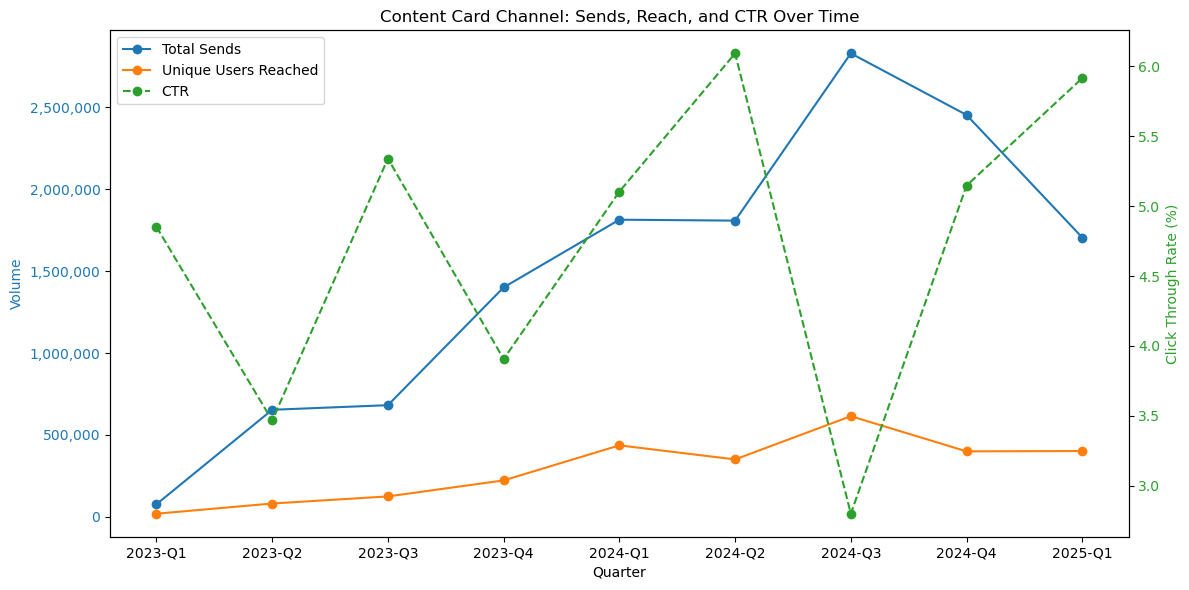

In [4]:
from pyspark.sql.functions import from_unixtime, to_date, date_format, col, count, countDistinct

df_cc_send = df_cc_send.withColumn("DATE", to_date(from_unixtime(col("TIME"))))
df_cc_send = df_cc_send.withColumn("YEAR_QUARTER", date_format(col("DATE"), "yyyy-'Q'q"))

df_sends_quarterly = df_cc_send.groupBy("YEAR_QUARTER").agg(
    count("*").alias("TOTAL_SENDS"),
    countDistinct("USER_ID").alias("UNIQUE_USERS_REACHED")
)

df_clicks_quarterly = df_cc_click.groupBy("YEAR_QUARTER").agg(
    count("*").alias("TOTAL_CLICKS")
)

# Join and calculate CTR
df_cc_metrics_quarterly = df_sends_quarterly.join(df_clicks_quarterly, on="YEAR_QUARTER", how="left")
df_cc_metrics_quarterly = df_cc_metrics_quarterly.withColumn(
    "CTR", (col("TOTAL_CLICKS") / col("TOTAL_SENDS")) * 100
).orderBy("YEAR_QUARTER")

# Convert to Pandas
pdf_cc_metrics = df_cc_metrics_quarterly.toPandas()

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax1 = plt.subplots(figsize=(12, 6))

# Left y-axis for sends and users
ax1.set_xlabel("Quarter")
ax1.set_ylabel("Volume", color="tab:blue")
ax1.plot(pdf_cc_metrics["YEAR_QUARTER"], pdf_cc_metrics["TOTAL_SENDS"], label="Total Sends", marker='o')
ax1.plot(pdf_cc_metrics["YEAR_QUARTER"], pdf_cc_metrics["UNIQUE_USERS_REACHED"], label="Unique Users Reached", marker='o')
ax1.tick_params(axis='y', labelcolor="tab:blue")

# Format primary y-axis numbers
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Right y-axis for CTR
ax2 = ax1.twinx()
ax2.set_ylabel("Click Through Rate (%)", color="tab:green")
ax2.plot(pdf_cc_metrics["YEAR_QUARTER"], pdf_cc_metrics["CTR"], label="CTR", color="tab:green", linestyle='--', marker='o')
ax2.tick_params(axis='y', labelcolor="tab:green")

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

# Final styling
plt.title("Content Card Channel: Sends, Reach, and CTR Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)  # Remove gridlines
plt.show()



In [6]:
df_cc_send = df_cc_send.join(
    df_app_groups.select("APP_GROUP_ID", "APP_GROUP_NAME"),
    on="APP_GROUP_ID",
    how="left"
)

df_cc_click = df_cc_click.join(
    df_app_groups.select("APP_GROUP_ID", "APP_GROUP_NAME"),
    on="APP_GROUP_ID",
    how="left"
)

In [8]:
from pyspark.sql.functions import count, countDistinct, col

# Total Content Card Sends by App Group
df_sends_grouped = df_cc_send.groupBy("APP_GROUP_NAME").agg(
    count("*").alias("TOTAL_CC_SENDS"),
    countDistinct("USER_ID").alias("UNIQUE_USERS_REACHED")
)

# Total Content Card Clicks by App Group
df_clicks_grouped = df_cc_click.groupBy("APP_GROUP_NAME").agg(
    count("*").alias("TOTAL_CC_CLICKS")
)

# Join sends and clicks to calculate CTR
df_cc_metrics_by_group = df_sends_grouped.join(
    df_clicks_grouped, on="APP_GROUP_NAME", how="left"
).withColumn(
    "CTR_PERCENT", (col("TOTAL_CC_CLICKS") / col("TOTAL_CC_SENDS")) * 100
)

# Display the results
df_cc_metrics_by_group.show(truncate=False)


+---------------------+--------------+--------------------+---------------+-----------------+
|APP_GROUP_NAME       |TOTAL_CC_SENDS|UNIQUE_USERS_REACHED|TOTAL_CC_CLICKS|CTR_PERCENT      |
+---------------------+--------------+--------------------+---------------+-----------------+
|Mammalians Nurturable|9006193       |819500              |350526         |3.892055166927913|
|Optics and Design    |4417298       |433843              |276126         |6.251015892520721|
+---------------------+--------------+--------------------+---------------+-----------------+



In [10]:
# Total Content Card Sends by App Group and Quarter
df_sends_grouped_quarterly = df_cc_send.groupBy("APP_GROUP_NAME", "YEAR_QUARTER").agg(
    count("*").alias("TOTAL_CC_SENDS"),
    countDistinct("USER_ID").alias("UNIQUE_USERS_REACHED")
)

# Total Content Card Clicks by App Group and Quarter
df_clicks_grouped_quarterly = df_cc_click.groupBy("APP_GROUP_NAME", "YEAR_QUARTER").agg(
    count("*").alias("TOTAL_CC_CLICKS")
)

# Join sends and clicks to calculate CTR by App Group and Quarter
df_cc_metrics_by_group_quarterly = df_sends_grouped_quarterly.join(
    df_clicks_grouped_quarterly, on=["APP_GROUP_NAME", "YEAR_QUARTER"], how="left"
).withColumn(
    "CTR_PERCENT", (col("TOTAL_CC_CLICKS") / col("TOTAL_CC_SENDS")) * 100
)
df_cc_metrics_by_group_quarterly = df_cc_metrics_by_group_quarterly.orderBy("YEAR_QUARTER")

df_cc_metrics_by_group_quarterly.show(truncate=False)

+---------------------+------------+--------------+--------------------+---------------+------------------+
|APP_GROUP_NAME       |YEAR_QUARTER|TOTAL_CC_SENDS|UNIQUE_USERS_REACHED|TOTAL_CC_CLICKS|CTR_PERCENT       |
+---------------------+------------+--------------+--------------------+---------------+------------------+
|Mammalians Nurturable|2023-Q1     |65254         |9174                |1810           |2.77377632022558  |
|Optics and Design    |2023-Q1     |11606         |10011               |1919           |16.534551094261587|
|Mammalians Nurturable|2023-Q2     |614098        |54659               |14030          |2.2846516354067266|
|Optics and Design    |2023-Q2     |39476         |26627               |8630           |21.861384132130915|
|Mammalians Nurturable|2023-Q3     |310503        |53998               |4815           |1.550709654979179 |
|Optics and Design    |2023-Q3     |371258        |70747               |31589          |8.508638197695403 |
|Mammalians Nurturable|2023-

### Push Notification Metrics
---

In [11]:
df_push_send = spark.read.csv("gs://brazecase-data/USERS_MESSAGES_PUSHNOTIFICATION_SEND.csv", header=True, inferSchema=True)
df_push_open = spark.read.csv("gs://brazecase-data/USERS_MESSAGES_PUSHNOTIFICATION_OPEN.csv", header=True, inferSchema=True)

In [4]:
df_push_send = df_push_send.withColumn("HOUR_OF_DAY", hour(from_unixtime(col("TIME"))))

# Define time of day categories
df_push_send = df_push_send.withColumn(
    "TIME_OF_DAY",
    when((col("HOUR_OF_DAY") >= 6) & (col("HOUR_OF_DAY") < 12), "Morning")
    .when((col("HOUR_OF_DAY") >= 12) & (col("HOUR_OF_DAY") < 18), "Afternoon")
    .when((col("HOUR_OF_DAY") >= 18) & (col("HOUR_OF_DAY") < 21), "Evening")
    .otherwise("Night")  # For hours between 9 PM and 6 AM
)

df_push_send = df_push_send.join(df_app_groups, on="APP_GROUP_ID", how="left")

df_push_send_time_of_day = df_push_send.groupBy("APP_GROUP_NAME", "TIME_OF_DAY").agg(
    count("*").alias("TOTAL_PUSH_SENDS")
)

df_push_send_time_of_day.show()


+--------------------+-----------+----------------+
|      APP_GROUP_NAME|TIME_OF_DAY|TOTAL_PUSH_SENDS|
+--------------------+-----------+----------------+
|   Optics and Design|    Morning|        16516902|
|Mammalians Nurtur...|    Morning|         6915917|
|Mammalians Nurtur...|    Evening|         5607688|
|Mammalians Nurtur...|  Afternoon|        17712837|
|Mammalians Nurtur...|      Night|         6371866|
|   Optics and Design|  Afternoon|        24876459|
|   Optics and Design|    Evening|         2867780|
|   Optics and Design|      Night|        12756762|
|                null|    Morning|               1|
+--------------------+-----------+----------------+



In [12]:
total_push_sends = df_push_send.count()
unique_push_users = df_push_send.select("USER_ID").distinct().count()
total_push_opens = df_push_open.count()
push_open_rate = (total_push_opens / total_push_sends) * 100

print("Total Push Notification Sends:", total_push_sends)
print("Unique Users Reached via Push:", unique_push_users)
print("Total Push Notification Opens:", total_push_opens)
print(f"Push Notification Open Rate: {push_open_rate:.2f}%")

Total Push Notification Sends: 93626212
Unique Users Reached via Push: 1918956
Total Push Notification Opens: 2672407
Push Notification Open Rate: 2.85%


In [13]:
df_push_send = df_push_send.withColumn("DATE", to_date(from_unixtime(col("TIME"))))
df_push_send = df_push_send.withColumn("YEAR_QUARTER", date_format(col("DATE"), "yyyy-'Q'q"))

df_push_open = df_push_open.withColumn("DATE", to_date(from_unixtime(col("TIME"))))
df_push_open = df_push_open.withColumn("YEAR_QUARTER", date_format(col("DATE"), "yyyy-'Q'q"))

# Aggregate sends per quarter
df_sends_quarterly = df_push_send.groupBy("YEAR_QUARTER").count().withColumnRenamed("count", "TOTAL_PUSH_SENDS")

# Aggregate opens per quarter
df_opens_quarterly = df_push_open.groupBy("YEAR_QUARTER").count().withColumnRenamed("count", "TOTAL_PUSH_OPENS")

df_push_summary_quarterly = df_sends_quarterly.join(df_opens_quarterly, on="YEAR_QUARTER", how="outer") \
    .withColumn("PUSH_OPEN_RATE", (col("TOTAL_PUSH_OPENS") / col("TOTAL_PUSH_SENDS")) * 100) \
    .orderBy("YEAR_QUARTER")

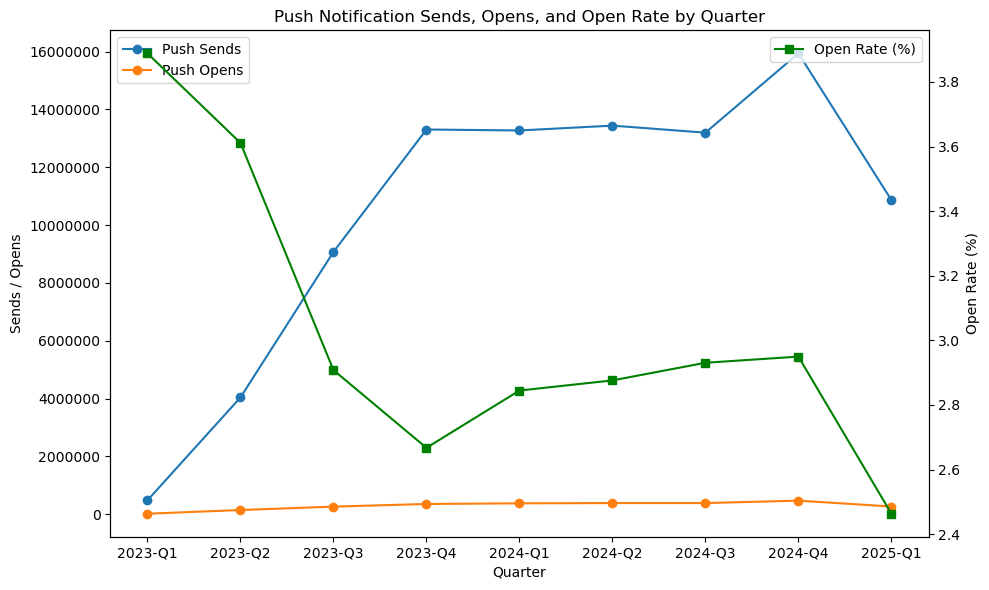

In [14]:
pdf_push = df_push_summary_quarterly.toPandas()

pdf_push = pdf_push.sort_values("YEAR_QUARTER")

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(pdf_push["YEAR_QUARTER"], pdf_push["TOTAL_PUSH_SENDS"], marker='o', label='Push Sends')
ax1.plot(pdf_push["YEAR_QUARTER"], pdf_push["TOTAL_PUSH_OPENS"], marker='o', label='Push Opens')
ax1.set_xlabel("Quarter")
ax1.set_ylabel("Sends / Opens")
ax1.tick_params(axis='y')
ax1.legend(loc="upper left")
ax1.ticklabel_format(style='plain', axis='y')  # Remove scientific notation
ax1.grid(False) 

ax2 = ax1.twinx()
ax2.plot(pdf_push["YEAR_QUARTER"], pdf_push["PUSH_OPEN_RATE"], color='green', marker='s', label='Open Rate (%)')
ax2.set_ylabel("Open Rate (%)")
ax2.tick_params(axis='y')
ax2.legend(loc="upper right")

plt.title("Push Notification Sends, Opens, and Open Rate by Quarter")
plt.tight_layout()
plt.show()

In [15]:
df_push_send = df_push_send.join(df_app_groups, on="APP_GROUP_ID", how="left")
df_push_open = df_push_open.join(df_app_groups, on="APP_GROUP_ID", how="left")

# Total Push Notification Sends by App Group
df_push_send_grouped = df_push_send.groupBy("APP_GROUP_NAME").agg(
    count("*").alias("TOTAL_PUSH_SENDS"),
    countDistinct("USER_ID").alias("UNIQUE_PUSH_USERS")
)

# Total Push Notification Opens by App Group
df_push_open_grouped = df_push_open.groupBy("APP_GROUP_NAME").agg(
    count("*").alias("TOTAL_PUSH_OPENS")
)

df_push_metrics_by_group = df_push_send_grouped.join(
    df_push_open_grouped, on="APP_GROUP_NAME", how="left"
).withColumn(
    "PUSH_OPEN_RATE", (col("TOTAL_PUSH_OPENS") / col("TOTAL_PUSH_SENDS")) * 100
)

df_push_metrics_by_group.show()

+--------------------+----------------+-----------------+----------------+------------------+
|      APP_GROUP_NAME|TOTAL_PUSH_SENDS|UNIQUE_PUSH_USERS|TOTAL_PUSH_OPENS|    PUSH_OPEN_RATE|
+--------------------+----------------+-----------------+----------------+------------------+
|Mammalians Nurtur...|        36608308|           977857|         1598723|  4.36710431959871|
|   Optics and Design|        57017903|           941099|         1073684|1.8830646928562071|
|                null|               1|                1|            null|              null|
+--------------------+----------------+-----------------+----------------+------------------+



In [16]:
df_push_send_quarterly = df_push_send.groupBy("APP_GROUP_NAME", "YEAR_QUARTER").count().withColumnRenamed("count", "TOTAL_PUSH_SENDS")
df_push_open_quarterly = df_push_open.groupBy("APP_GROUP_NAME", "YEAR_QUARTER").count().withColumnRenamed("count", "TOTAL_PUSH_OPENS")
df_push_quarterly = df_push_send_quarterly.join(df_push_open_quarterly, on=["APP_GROUP_NAME", "YEAR_QUARTER"], how="outer").withColumn(
    "PUSH_OPEN_RATE", (col("TOTAL_PUSH_OPENS") / col("TOTAL_PUSH_SENDS")) * 100
)

df_push_quarterly_sorted = df_push_quarterly.orderBy("YEAR_QUARTER", ascending=True)


In [17]:
df_push_quarterly_sorted.show(truncate=False)

+---------------------+------------+----------------+----------------+------------------+
|APP_GROUP_NAME       |YEAR_QUARTER|TOTAL_PUSH_SENDS|TOTAL_PUSH_OPENS|PUSH_OPEN_RATE    |
+---------------------+------------+----------------+----------------+------------------+
|Mammalians Nurturable|2023-Q1     |164241          |5631            |3.428498365207226 |
|Optics and Design    |2023-Q1     |318162          |13127           |4.125885555157435 |
|Optics and Design    |2023-Q2     |2756561         |88058           |3.194487624253554 |
|Mammalians Nurturable|2023-Q2     |1283170         |57823           |4.506261835921975 |
|Mammalians Nurturable|2023-Q3     |2171192         |80927           |3.727307396121578 |
|Optics and Design    |2023-Q3     |6902246         |182924          |2.6502098012733826|
|Mammalians Nurturable|2023-Q4     |3004565         |151860          |5.054309026431446 |
|Optics and Design    |2023-Q4     |10302720        |203094          |1.971265840477078 |
|Optics an

### E-Mail Metrics
---

In [14]:
df_email_send = spark.read.csv("gs://brazecase-data/USERS_MESSAGES_EMAIL_SEND.csv", header=True, inferSchema=True)

total_email_sends = df_email_send.count()

unique_email_send_users = df_email_send.select("USER_ID").distinct().count()

df_email_send = df_email_send.withColumn("DATE", to_date(from_unixtime(col("TIME"))))
df_email_send = df_email_send.withColumn("YEAR_QUARTER", date_format(col("DATE"), "yyyy-'Q'q"))

In [15]:
df_email_open = spark.read.csv("gs://brazecase-data/USERS_MESSAGES_EMAIL_OPEN.csv", header=True, inferSchema=True)

total_email_opens = df_email_open.count()

unique_email_open_users = df_email_open.select("USER_ID").distinct().count()

df_email_open = df_email_open.withColumn("DATE", to_date(from_unixtime(col("TIME"))))
df_email_open = df_email_open.withColumn("YEAR_QUARTER", date_format(col("DATE"), "yyyy-'Q'q"))

In [16]:
df_email_click = spark.read.csv("gs://brazecase-data/USERS_MESSAGES_EMAIL_CLICK.csv", header=True, inferSchema=True)

total_email_clicks = df_email_click.count()

unique_email_click_users = df_email_click.select("USER_ID").distinct().count()

df_email_click = df_email_click.withColumn("DATE", to_date(from_unixtime(col("TIME"))))
df_email_click = df_email_click.withColumn("YEAR_QUARTER", date_format(col("DATE"), "yyyy-'Q'q"))

In [17]:
df_email_unsub = spark.read.csv("gs://brazecase-data/USERS_MESSAGES_EMAIL_UNSUBSCRIBE.csv", header=True, inferSchema=True)

total_email_unsubs = df_email_unsub.count()

unique_email_unsub_users = df_email_unsub.select("USER_ID").distinct().count()

df_email_unsub = df_email_unsub.withColumn("DATE", to_date(from_unixtime(col("TIME"))))
df_email_unsub = df_email_unsub.withColumn("YEAR_QUARTER", date_format(col("DATE"), "yyyy-'Q'q"))

In [18]:
df_email_delivery = spark.read.csv("gs://brazecase-data/USERS_MESSAGES_EMAIL_DELIVERY.csv", header=True, inferSchema=True)

total_email_delivered = df_email_delivery.count()

unique_email_delivered_users = df_email_delivery.select("USER_ID").distinct().count()

df_email_delivery = df_email_delivery.withColumn("DATE", to_date(from_unixtime(col("TIME"))))
df_email_delivery = df_email_delivery.withColumn("YEAR_QUARTER", date_format(col("DATE"), "yyyy-'Q'q"))


In [20]:
print("Total Email Sends:", total_email_sends)
print("Unique Users Reached by Email:", unique_email_send_users)

Total Email Sends: 63952221
Unique Users Reached by Email: 2223462


In [21]:
print("Total Email Deliveries:", total_email_delivered)
print("Unique Users Delivered Email:", unique_email_delivered_users)

email_delivery_rate = (total_email_delivered / total_email_sends) * 100
print(f"Email Delivery Rate: {email_delivery_rate:.2f}%")

Total Email Deliveries: 62931861
Unique Users Delivered Email: 2168894
Email Delivery Rate: 98.40%


In [22]:
print("Total Email Opens:", total_email_opens)
print("Unique Users Who Opened Email:", unique_email_open_users)

email_open_rate = (total_email_opens / total_email_sends) * 100
print(f"Email Open Rate: {email_open_rate:.2f}%")

Total Email Opens: 34914482
Unique Users Who Opened Email: 1425056
Email Open Rate: 54.59%


In [19]:
print("Total Email Clicks:", total_email_clicks)
print("Unique Users Who Clicked Email:", unique_email_click_users)

email_ctr = (total_email_clicks / total_email_opens) * 100
print(f"Email Click-to-open Rate: {email_ctr:.2f}%")

Total Email Clicks: 1377082
Unique Users Who Clicked Email: 433026
Email Click-to-open Rate: 3.94%


In [23]:
print("Total Email Unsubscribes:", total_email_unsubs)
print("Unique Users Who Unsubscribed:", unique_email_unsub_users)

email_unsub_rate = (total_email_unsubs / total_email_sends) * 100
print(f"Email Unsubscribe Rate: {email_unsub_rate:.2f}%")

Total Email Unsubscribes: 63544
Unique Users Who Unsubscribed: 46253
Email Unsubscribe Rate: 0.10%


In [28]:
from pyspark.sql.functions import countDistinct, count, col, round

email_quarterly = df_email_send.groupBy("YEAR_QUARTER").agg(
    count("*").alias("SENDS")
).join(
    df_email_delivery.groupBy("YEAR_QUARTER").agg(count("*").alias("DELIVERIES")),
    on="YEAR_QUARTER", how="outer"
).join(
    df_email_open.groupBy("YEAR_QUARTER").agg(count("*").alias("OPENS")),
    on="YEAR_QUARTER", how="outer"
).join(
    df_email_click.groupBy("YEAR_QUARTER").agg(count("*").alias("CLICKS")),
    on="YEAR_QUARTER", how="outer"
).join(
    df_email_unsub.groupBy("YEAR_QUARTER").agg(count("*").alias("UNSUBSCRIBES")),
    on="YEAR_QUARTER", how="outer"
)

email_quarterly = email_quarterly.withColumn("DELIVERY_RATE", round((col("DELIVERIES") / col("SENDS")) * 100, 3))

email_quarterly = email_quarterly.withColumn("ENGAGEMENT_RATE", round(((col("OPENS") + col("CLICKS")) / col("SENDS")) * 100, 3))

df_email_open_users = df_email_open.groupBy("YEAR_QUARTER").agg(countDistinct("USER_ID").alias("OPEN_USERS"))
df_email_click_users = df_email_click.groupBy("YEAR_QUARTER").agg(countDistinct("USER_ID").alias("CLICK_USERS"))
df_email_engaged_users = df_email_open_users.join(df_email_click_users, on="YEAR_QUARTER", how="outer") \
    .withColumn("ENGAGED_USERS", col("OPEN_USERS") + col("CLICK_USERS"))

email_quarterly = email_quarterly.join(df_email_engaged_users, on="YEAR_QUARTER", how="left")
email_quarterly = email_quarterly.withColumn(
    "CLICK_TO_OPEN_RATE",
    round((col("CLICKS") / col("OPENS")) * 100, 3)
)
email_quarterly = email_quarterly.withColumn("UNSUBSCRIBE_RATE", round((col("UNSUBSCRIBES") / col("SENDS")) * 100, 3))

email_quarterly = email_quarterly.orderBy("YEAR_QUARTER")

email_quarterly.show(truncate=False)

+------------+--------+----------+-------+------+------------+-------------+---------------+----------+-----------+-------------+------------------+----------------+
|YEAR_QUARTER|SENDS   |DELIVERIES|OPENS  |CLICKS|UNSUBSCRIBES|DELIVERY_RATE|ENGAGEMENT_RATE|OPEN_USERS|CLICK_USERS|ENGAGED_USERS|CLICK_TO_OPEN_RATE|UNSUBSCRIBE_RATE|
+------------+--------+----------+-------+------+------------+-------------+---------------+----------+-----------+-------------+------------------+----------------+
|2023-Q1     |382424  |375987    |187200 |14513 |309         |98.317       |52.746         |45381     |7174       |52555        |7.753             |0.081           |
|2023-Q2     |2922837 |2875179   |1416739|63142 |3976        |98.369       |50.632         |167952    |28043      |195995       |4.457             |0.136           |
|2023-Q3     |4645876 |4588423   |2301634|164422|5041        |98.763       |53.081         |263335    |64630      |327965       |7.144             |0.109           |
|202

In [25]:
email_quarterly_pd = email_quarterly.toPandas()

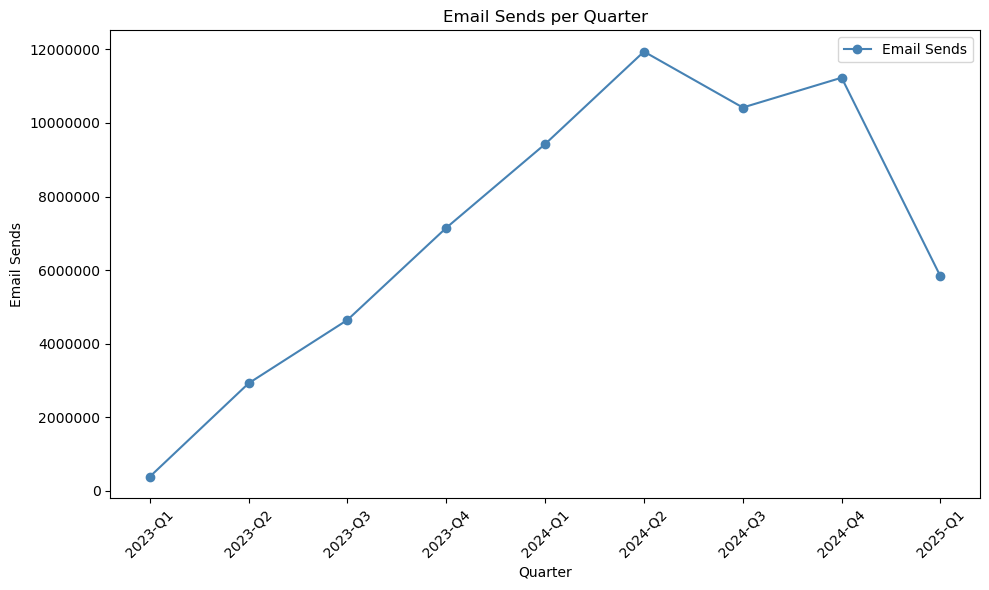

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(email_quarterly_pd['YEAR_QUARTER'], email_quarterly_pd['SENDS'], marker='o', linestyle='-', color='steelblue', label='Email Sends')

plt.xlabel('Quarter')
plt.ylabel('Email Sends')
plt.title('Email Sends per Quarter')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

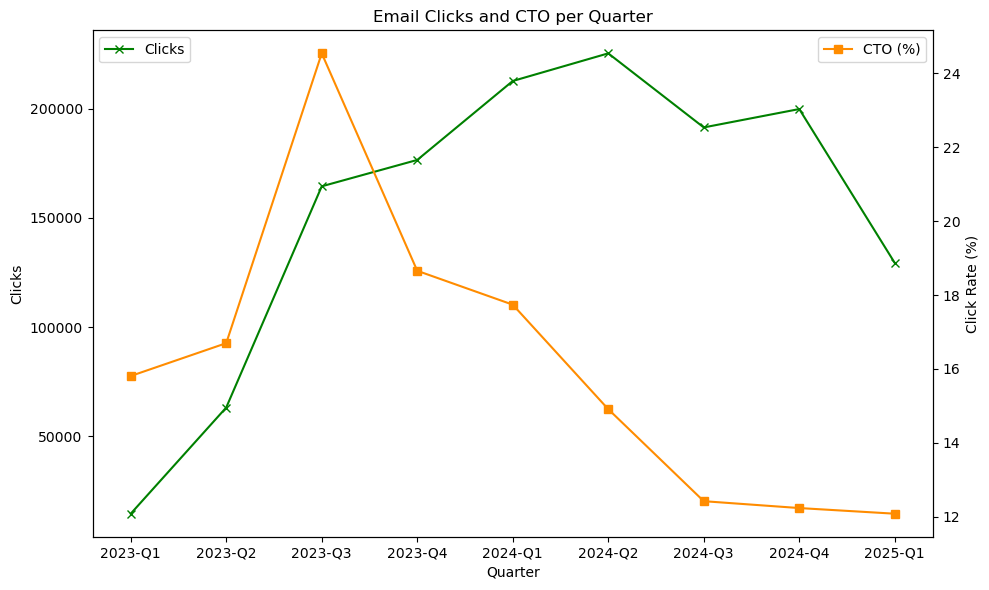

In [29]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(email_quarterly_pd['YEAR_QUARTER'], email_quarterly_pd['CLICKS'], marker='x', label='Clicks', color='green')
ax2.plot(email_quarterly_pd['YEAR_QUARTER'], email_quarterly_pd['CLICK_TO_OPEN_RATE'], marker='s', label='CTO (%)', color='darkorange')

ax1.set_xlabel('Quarter')
ax1.set_ylabel('Clicks')
ax2.set_ylabel('Click Rate (%)')

ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='plain', axis='y')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Email Clicks and CTO per Quarter')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

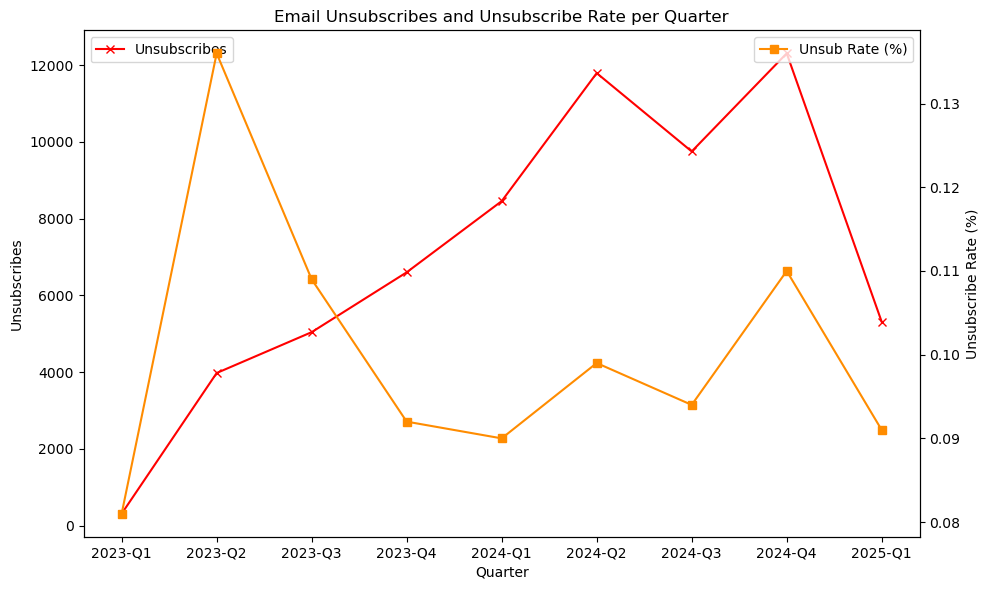

In [30]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(email_quarterly_pd['YEAR_QUARTER'], email_quarterly_pd['UNSUBSCRIBES'], marker='x', label='Unsubscribes', color='red')
ax2.plot(email_quarterly_pd['YEAR_QUARTER'], email_quarterly_pd['UNSUBSCRIBE_RATE'], marker='s', label='Unsub Rate (%)', color='darkorange')

ax1.set_xlabel('Quarter')
ax1.set_ylabel('Unsubscribes')
ax2.set_ylabel('Unsubscribe Rate (%)')

ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='plain', axis='y')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Email Unsubscribes and Unsubscribe Rate per Quarter')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

In [31]:
email_delivery_rate = (total_email_delivered / total_email_sends) * 100
print(f"Email Delivery Rate: {email_delivery_rate:.2f}%")

Email Delivery Rate: 98.40%


In [32]:
engagement_rate = ((total_email_opens + total_email_clicks) / total_email_sends) * 100
print(f"Email Engagement Rate: {engagement_rate:.2f}%")

Email Engagement Rate: 56.75%


In [33]:
engaged_users = df_email_open.select("USER_ID").union(df_email_click.select("USER_ID")).distinct().count()
print(f"Engaged Users: {engaged_users}")

Engaged Users: 1432463


In [34]:
df_email_send = df_email_send.join(df_app_groups, on="APP_GROUP_ID", how="left")
df_email_delivery = df_email_delivery.join(df_app_groups, on="APP_GROUP_ID", how="left")
df_email_open = df_email_open.join(df_app_groups, on="APP_GROUP_ID", how="left")
df_email_click = df_email_click.join(df_app_groups, on="APP_GROUP_ID", how="left")
df_email_unsub = df_email_unsub.join(df_app_groups, on="APP_GROUP_ID", how="left")


df_email_send_grouped = df_email_send.groupBy("APP_GROUP_NAME").agg(
    count("*").alias("TOTAL_EMAIL_SENDS"),
    countDistinct("USER_ID").alias("UNIQUE_EMAIL_USERS")
)

df_email_delivery_grouped = df_email_delivery.groupBy("APP_GROUP_NAME").agg(
    count("*").alias("TOTAL_EMAIL_DELIVERIES"),
    countDistinct("USER_ID").alias("UNIQUE_DELIVERED_USERS")
)

df_email_open_grouped = df_email_open.groupBy("APP_GROUP_NAME").agg(
    count("*").alias("TOTAL_EMAIL_OPENS"),
    countDistinct("USER_ID").alias("UNIQUE_OPENED_USERS")
)

df_email_click_grouped = df_email_click.groupBy("APP_GROUP_NAME").agg(
    count("*").alias("TOTAL_EMAIL_CLICKS"),
    countDistinct("USER_ID").alias("UNIQUE_CLICKED_USERS")
)

df_email_unsub_grouped = df_email_unsub.groupBy("APP_GROUP_NAME").agg(
    count("*").alias("TOTAL_EMAIL_UNSUBSCRIBES"),
    countDistinct("USER_ID").alias("UNIQUE_UNSUBSCRIBED_USERS")
)

df_email_metrics = df_email_send_grouped \
    .join(df_email_delivery_grouped, on="APP_GROUP_NAME", how="left") \
    .join(df_email_open_grouped, on="APP_GROUP_NAME", how="left") \
    .join(df_email_click_grouped, on="APP_GROUP_NAME", how="left") \
    .join(df_email_unsub_grouped, on="APP_GROUP_NAME", how="left")


# Delivery Rate
df_email_metrics = df_email_metrics.withColumn("DELIVERY_RATE", round((col("TOTAL_EMAIL_DELIVERIES") / col("TOTAL_EMAIL_SENDS")) * 100, 3))

# Engagement Rate
df_email_metrics = df_email_metrics.withColumn("ENGAGEMENT_RATE", round(((col("TOTAL_EMAIL_OPENS") + col("TOTAL_EMAIL_CLICKS")) / col("TOTAL_EMAIL_SENDS")) * 100, 3))

# Open Rate
df_email_metrics = df_email_metrics.withColumn("OPEN_RATE", round((col("TOTAL_EMAIL_OPENS") / col("TOTAL_EMAIL_DELIVERIES")) * 100, 3))

# Click-Through Rate
df_email_metrics = df_email_metrics.withColumn("CLICK_TO_OPEN_RATE", round((col("TOTAL_EMAIL_CLICKS") / col("TOTAL_EMAIL_OPENS")) * 100, 3))

# Unsubscribe Rate
df_email_metrics = df_email_metrics.withColumn("UNSUBSCRIBE_RATE", round((col("TOTAL_EMAIL_UNSUBSCRIBES") / col("TOTAL_EMAIL_SENDS")) * 100, 3))

# Engaged Users
df_email_metrics = df_email_metrics.withColumn("ENGAGED_USERS", col("UNIQUE_OPENED_USERS") + col("UNIQUE_CLICKED_USERS"))

df_email_metrics.show(truncate=False)


+---------------------+-----------------+------------------+----------------------+----------------------+-----------------+-------------------+------------------+--------------------+------------------------+-------------------------+-------------+---------------+---------+------------------+----------------+-------------+
|APP_GROUP_NAME       |TOTAL_EMAIL_SENDS|UNIQUE_EMAIL_USERS|TOTAL_EMAIL_DELIVERIES|UNIQUE_DELIVERED_USERS|TOTAL_EMAIL_OPENS|UNIQUE_OPENED_USERS|TOTAL_EMAIL_CLICKS|UNIQUE_CLICKED_USERS|TOTAL_EMAIL_UNSUBSCRIBES|UNIQUE_UNSUBSCRIBED_USERS|DELIVERY_RATE|ENGAGEMENT_RATE|OPEN_RATE|CLICK_TO_OPEN_RATE|UNSUBSCRIBE_RATE|ENGAGED_USERS|
+---------------------+-----------------+------------------+----------------------+----------------------+-----------------+-------------------+------------------+--------------------+------------------------+-------------------------+-------------+---------------+---------+------------------+----------------+-------------+
|Mammalians Nurturable

In [35]:
df_email_send_filtered = df_email_send.filter(df_email_send['APP_GROUP_NAME'].isin(['Mammalians Nurturable', 'Optics and Design']))
df_email_delivery_filtered = df_email_delivery.filter(df_email_delivery['APP_GROUP_NAME'].isin(['Mammalians Nurturable', 'Optics and Design']))
df_email_open_filtered = df_email_open.filter(df_email_open['APP_GROUP_NAME'].isin(['Mammalians Nurturable', 'Optics and Design']))
df_email_click_filtered = df_email_click.filter(df_email_click['APP_GROUP_NAME'].isin(['Mammalians Nurturable', 'Optics and Design']))
df_email_unsub_filtered = df_email_unsub.filter(df_email_unsub['APP_GROUP_NAME'].isin(['Mammalians Nurturable', 'Optics and Design']))

df_email_send_grouped = df_email_send_filtered.groupBy("YEAR_QUARTER", "APP_GROUP_NAME").agg(
    F.count("*").alias("TOTAL_EMAIL_SENDS"),
    F.countDistinct("USER_ID").alias("UNIQUE_EMAIL_USERS")
)

df_email_delivery_grouped = df_email_delivery_filtered.groupBy("YEAR_QUARTER", "APP_GROUP_NAME").agg(
    F.count("*").alias("TOTAL_EMAIL_DELIVERIES"),
    F.countDistinct("USER_ID").alias("UNIQUE_DELIVERED_USERS")
)

df_email_open_grouped = df_email_open_filtered.groupBy("YEAR_QUARTER", "APP_GROUP_NAME").agg(
    F.count("*").alias("TOTAL_EMAIL_OPENS"),
    F.countDistinct("USER_ID").alias("UNIQUE_OPENED_USERS")
)

df_email_click_grouped = df_email_click_filtered.groupBy("YEAR_QUARTER", "APP_GROUP_NAME").agg(
    F.count("*").alias("TOTAL_EMAIL_CLICKS"),
    F.countDistinct("USER_ID").alias("UNIQUE_CLICKED_USERS")
)

df_email_unsub_grouped = df_email_unsub_filtered.groupBy("YEAR_QUARTER", "APP_GROUP_NAME").agg(
    F.count("*").alias("TOTAL_EMAIL_UNSUBSCRIBES"),
    F.countDistinct("USER_ID").alias("UNIQUE_UNSUBSCRIBED_USERS")
)

# Join all grouped dataframes
df_email_metrics_quarterly = df_email_send_grouped \
    .join(df_email_delivery_grouped, on=["YEAR_QUARTER", "APP_GROUP_NAME"], how="left") \
    .join(df_email_open_grouped, on=["YEAR_QUARTER", "APP_GROUP_NAME"], how="left") \
    .join(df_email_click_grouped, on=["YEAR_QUARTER", "APP_GROUP_NAME"], how="left") \
    .join(df_email_unsub_grouped, on=["YEAR_QUARTER", "APP_GROUP_NAME"], how="left")

df_email_metrics_quarterly = df_email_metrics_quarterly.withColumn("DELIVERY_RATE", F.round((col("TOTAL_EMAIL_DELIVERIES") / col("TOTAL_EMAIL_SENDS")) * 100, 3))
df_email_metrics_quarterly = df_email_metrics_quarterly.withColumn("ENGAGEMENT_RATE", F.round(((col("TOTAL_EMAIL_OPENS") + col("TOTAL_EMAIL_CLICKS")) / col("TOTAL_EMAIL_SENDS")) * 100, 3))
df_email_metrics_quarterly = df_email_metrics_quarterly.withColumn("OPEN_RATE", F.round((col("TOTAL_EMAIL_OPENS") / col("TOTAL_EMAIL_DELIVERIES")) * 100, 3))
df_email_metrics_quarterly = df_email_metrics_quarterly.withColumn("CLICK_TO_OPEN_RATE", F.round((col("TOTAL_EMAIL_CLICKS") / col("TOTAL_EMAIL_OPENS")) * 100, 3))
df_email_metrics_quarterly = df_email_metrics_quarterly.withColumn("UNSUBSCRIBE_RATE", F.round((col("TOTAL_EMAIL_UNSUBSCRIBES") / col("TOTAL_EMAIL_SENDS")) * 100, 3))
df_email_metrics_quarterly = df_email_metrics_quarterly.withColumn("ENGAGED_USERS", col("UNIQUE_OPENED_USERS") + col("UNIQUE_CLICKED_USERS"))

df_email_metrics_quarterly = df_email_metrics_quarterly.orderBy("YEAR_QUARTER", "APP_GROUP_NAME")

df_email_metrics_quarterly.show(truncate=False)


+------------+---------------------+-----------------+------------------+----------------------+----------------------+-----------------+-------------------+------------------+--------------------+------------------------+-------------------------+-------------+---------------+---------+------------------+----------------+-------------+
|YEAR_QUARTER|APP_GROUP_NAME       |TOTAL_EMAIL_SENDS|UNIQUE_EMAIL_USERS|TOTAL_EMAIL_DELIVERIES|UNIQUE_DELIVERED_USERS|TOTAL_EMAIL_OPENS|UNIQUE_OPENED_USERS|TOTAL_EMAIL_CLICKS|UNIQUE_CLICKED_USERS|TOTAL_EMAIL_UNSUBSCRIBES|UNIQUE_UNSUBSCRIBED_USERS|DELIVERY_RATE|ENGAGEMENT_RATE|OPEN_RATE|CLICK_TO_OPEN_RATE|UNSUBSCRIBE_RATE|ENGAGED_USERS|
+------------+---------------------+-----------------+------------------+----------------------+----------------------+-----------------+-------------------+------------------+--------------------+------------------------+-------------------------+-------------+---------------+---------+------------------+---------------

### In-App Message Metrics
---

In [25]:
df_inapp_impression = spark.read.csv("gs://brazecase-data/USERS_MESSAGES_INAPPMESSAGE_IMPRESSION.csv", header=True, inferSchema=True)

df_inapp_click = spark.read.csv("gs://brazecase-data/USERS_MESSAGES_INAPPMESSAGE_CLICK.csv", header=True, inferSchema=True)

In [26]:
total_impressions = df_inapp_impression.count()
unique_impression_users = df_inapp_impression.select("USER_ID").distinct().count()

total_clicks = df_inapp_click.count()
unique_click_users = df_inapp_click.select("USER_ID").distinct().count()

print("Total In-App Impressions:", total_impressions)
print("Unique Users Reached via In-App:", unique_impression_users)
print("Total In-App Clicks:", total_clicks)
print("Unique Users Who Clicked:", unique_click_users)

inapp_ctr = (total_clicks / total_impressions) * 100
print(f"In-App Message Click Through Rate: {inapp_ctr:.2f}%")

Total In-App Impressions: 10264532
Unique Users Reached via In-App: 1682317
Total In-App Clicks: 3289978
Unique Users Who Clicked: 990503
In-App Message Click Through Rate: 32.05%


In [27]:
df_inapp_impression = df_inapp_impression.withColumn("DATE", to_date(from_unixtime(col("TIME"))))
df_inapp_impression = df_inapp_impression.withColumn("YEAR_QUARTER", date_format(col("DATE"), "yyyy-'Q'q"))

df_inapp_click = df_inapp_click.withColumn("DATE", to_date(from_unixtime(col("TIME"))))
df_inapp_click = df_inapp_click.withColumn("YEAR_QUARTER", date_format(col("DATE"), "yyyy-'Q'q"))

In [28]:
inapp_quarterly = df_inapp_impression.groupBy("YEAR_QUARTER").agg(
    count("*").alias("IMPRESSIONS")
).join(
    df_inapp_click.groupBy("YEAR_QUARTER").agg(
        count("*").alias("CLICKS")
    ),
    on="YEAR_QUARTER", how="outer"
)

inapp_quarterly = inapp_quarterly.withColumn("CLICK_THROUGH_RATE", (col("CLICKS") / col("IMPRESSIONS")) * 100)

inapp_quarterly = inapp_quarterly.orderBy("YEAR_QUARTER")

inapp_quarterly.show(truncate=False)

+------------+-----------+------+------------------+
|YEAR_QUARTER|IMPRESSIONS|CLICKS|CLICK_THROUGH_RATE|
+------------+-----------+------+------------------+
|2023-Q1     |359051     |75562 |21.044921195039144|
|2023-Q2     |873415     |411925|47.16257449207994 |
|2023-Q3     |937421     |276812|29.529101652299232|
|2023-Q4     |1026030    |186357|18.16291921288851 |
|2024-Q1     |1230704    |275911|22.4189569547186  |
|2024-Q2     |1553042    |529033|34.06430734004618 |
|2024-Q3     |1651897    |699490|42.344649817754984|
|2024-Q4     |1594781    |508311|31.873404561504053|
|2025-Q1     |1038191    |326577|31.456350517390348|
+------------+-----------+------+------------------+



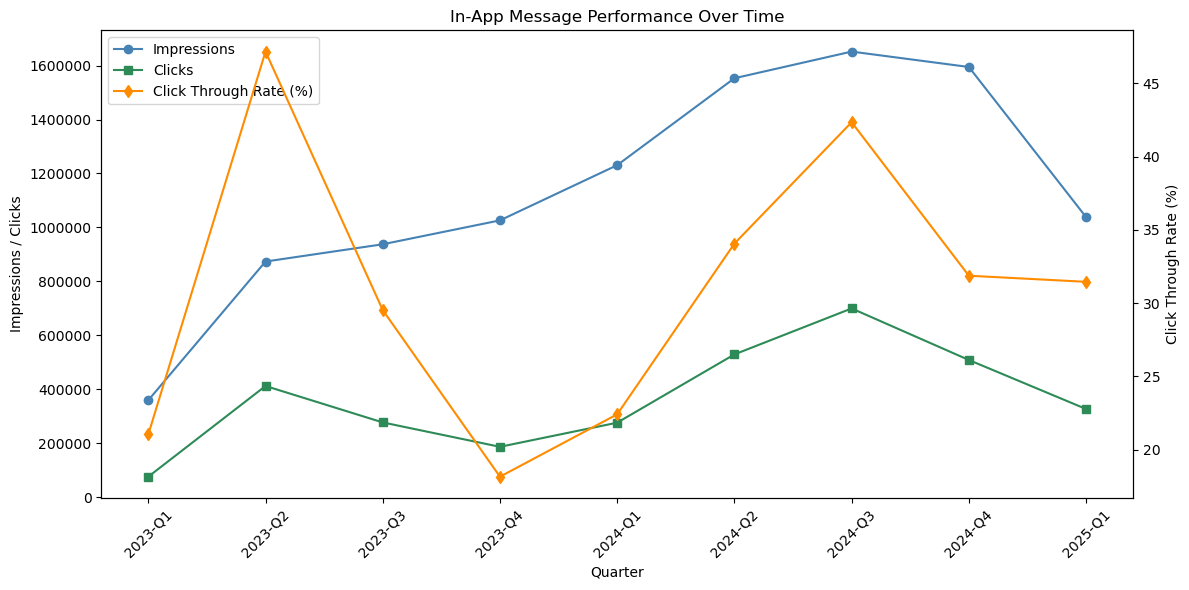

In [29]:
inapp_df = inapp_quarterly.toPandas()

# Set up plot
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Plot impressions and clicks on primary Y-axis
ax1.plot(inapp_df['YEAR_QUARTER'], inapp_df['IMPRESSIONS'], marker='o', label='Impressions', color='steelblue')
ax1.plot(inapp_df['YEAR_QUARTER'], inapp_df['CLICKS'], marker='s', label='Clicks', color='seagreen')

# Plot CTR on secondary Y-axis
ax2.plot(inapp_df['YEAR_QUARTER'], inapp_df['CLICK_THROUGH_RATE'], marker='d', label='Click Through Rate (%)', color='darkorange')

# Formatting
ax1.set_ylabel('Impressions / Clicks')
ax2.set_ylabel('Click Through Rate (%)')
ax1.set_xlabel('Quarter')
ax1.tick_params(axis='x', rotation=45)
ax1.get_yaxis().get_major_formatter().set_scientific(False) 
ax2.get_yaxis().get_major_formatter().set_scientific(False)
ax1.grid(False)
ax2.grid(False)

# Legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('In-App Message Performance Over Time')
plt.tight_layout()
plt.show()

In [30]:
df_inapp_impression = df_inapp_impression.join(df_app_groups, on="APP_GROUP_ID", how="left")
df_inapp_click = df_inapp_click.join(df_app_groups, on="APP_GROUP_ID", how="left")

df_inapp_impression_grouped = df_inapp_impression.groupBy("APP_GROUP_NAME").agg(
    count("*").alias("TOTAL_INAPP_IMPRESSIONS"),
    countDistinct("USER_ID").alias("UNIQUE_INAPP_IMPRESSION_USERS")
)

df_inapp_click_grouped = df_inapp_click.groupBy("APP_GROUP_NAME").agg(
    count("*").alias("TOTAL_INAPP_CLICKS"),
    countDistinct("USER_ID").alias("UNIQUE_INAPP_CLICK_USERS")
)

df_inapp_metrics_by_group = df_inapp_impression_grouped.join(
    df_inapp_click_grouped, on="APP_GROUP_NAME", how="left"
)

df_inapp_metrics_by_group = df_inapp_metrics_by_group.withColumn(
    "INAPP_CTR", (col("TOTAL_INAPP_CLICKS") / col("TOTAL_INAPP_IMPRESSIONS")) * 100
)

df_inapp_metrics_by_group.show(truncate=False)

+---------------------+-----------------------+-----------------------------+------------------+------------------------+------------------+
|APP_GROUP_NAME       |TOTAL_INAPP_IMPRESSIONS|UNIQUE_INAPP_IMPRESSION_USERS|TOTAL_INAPP_CLICKS|UNIQUE_INAPP_CLICK_USERS|INAPP_CTR         |
+---------------------+-----------------------+-----------------------------+------------------+------------------------+------------------+
|Mammalians Nurturable|8432377                |1166657                      |2529600           |784976                  |29.998658741182943|
|Optics and Design    |1832155                |515660                       |760378            |205527                  |41.50183799951424 |
+---------------------+-----------------------+-----------------------------+------------------+------------------------+------------------+



In [32]:
df_inapp_impression = df_inapp_impression.withColumn("DATE", to_date(from_unixtime(col("TIME"))))
df_inapp_impression = df_inapp_impression.withColumn("YEAR_QUARTER", date_format(col("DATE"), "yyyy-'Q'q"))

df_inapp_click = df_inapp_click.withColumn("DATE", to_date(from_unixtime(col("TIME"))))
df_inapp_click = df_inapp_click.withColumn("YEAR_QUARTER", date_format(col("DATE"), "yyyy-'Q'q"))

df_inapp_impression_grouped = df_inapp_impression.groupBy("APP_GROUP_NAME", "YEAR_QUARTER").agg(
    count("*").alias("TOTAL_INAPP_IMPRESSIONS"),
    countDistinct("USER_ID").alias("UNIQUE_INAPP_IMPRESSION_USERS")
)

df_inapp_click_grouped = df_inapp_click.groupBy("APP_GROUP_NAME", "YEAR_QUARTER").agg(
    count("*").alias("TOTAL_INAPP_CLICKS"),
    countDistinct("USER_ID").alias("UNIQUE_INAPP_CLICK_USERS")
)

df_inapp_metrics_by_group_quarter = df_inapp_impression_grouped.join(
    df_inapp_click_grouped, on=["APP_GROUP_NAME", "YEAR_QUARTER"], how="left"
)

df_inapp_metrics_by_group_quarter = df_inapp_metrics_by_group_quarter.withColumn(
    "INAPP_CTR", round((col("TOTAL_INAPP_CLICKS") / col("TOTAL_INAPP_IMPRESSIONS")) * 100, 3)
)

df_inapp_metrics_by_group_quarter = df_inapp_metrics_by_group_quarter.orderBy("YEAR_QUARTER", ascending=True)

df_inapp_metrics_by_group_quarter.show(truncate=False)

+---------------------+------------+-----------------------+-----------------------------+------------------+------------------------+---------+
|APP_GROUP_NAME       |YEAR_QUARTER|TOTAL_INAPP_IMPRESSIONS|UNIQUE_INAPP_IMPRESSION_USERS|TOTAL_INAPP_CLICKS|UNIQUE_INAPP_CLICK_USERS|INAPP_CTR|
+---------------------+------------+-----------------------+-----------------------------+------------------+------------------------+---------+
|Mammalians Nurturable|2023-Q1     |76316                  |50898                        |21519             |18127                   |28.197   |
|Optics and Design    |2023-Q1     |282735                 |215747                       |54043             |19210                   |19.114   |
|Mammalians Nurturable|2023-Q2     |506415                 |207555                       |173135            |118786                  |34.188   |
|Optics and Design    |2023-Q2     |367000                 |81654                        |238790            |41761                

### SMS Metrics
---

In [13]:
df_sms_send = spark.read.csv("gs://brazecase-data/USERS_MESSAGES_SMS_SEND.csv", header=True, inferSchema=True)

total_sms_sends = df_sms_send.count()

unique_sms_send_users = df_sms_send.select("USER_ID").distinct().count()

df_sms_send = df_sms_send.withColumn("DATE", to_date(from_unixtime(col("TIME"))))
df_sms_send = df_sms_send.withColumn("YEAR_QUARTER", date_format(col("DATE"), "yyyy-'Q'q"))

print("Total SMS Sends:", total_sms_sends)
print("Unique Users Reached via SMS:", unique_sms_send_users)

Total SMS Sends: 541850
Unique Users Reached via SMS: 88131


In [14]:
df_sms_delivery = spark.read.csv("gs://brazecase-data/USERS_MESSAGES_SMS_DELIVERY.csv", header=True, inferSchema=True)

total_sms_deliveries = df_sms_delivery.count()

unique_sms_delivery_users = df_sms_delivery.select("USER_ID").distinct().count()

df_sms_delivery = df_sms_delivery.withColumn("DATE", to_date(from_unixtime(col("TIME"))))
df_sms_delivery = df_sms_delivery.withColumn("YEAR_QUARTER", date_format(col("DATE"), "yyyy-'Q'q"))

print("Total SMS Deliveries:", total_sms_deliveries)
print("Unique Users Delivered SMS:", unique_sms_delivery_users)

Total SMS Deliveries: 426504
Unique Users Delivered SMS: 81050


In [15]:
df_sms_click = spark.read.csv("gs://brazecase-data/USERS_MESSAGES_SMS_SHORTLINKCLICK.csv", header=True, inferSchema=True)

total_sms_clicks = df_sms_click.count()

unique_sms_click_users = df_sms_click.select("USER_ID").distinct().count()

df_sms_click = df_sms_click.withColumn("DATE", to_date(from_unixtime(col("TIME"))))
df_sms_click = df_sms_click.withColumn("YEAR_QUARTER", date_format(col("DATE"), "yyyy-'Q'q"))

print("Total SMS Shortlink Clicks:", total_sms_clicks)
print("Unique Users Who Clicked:", unique_sms_click_users)

Total SMS Shortlink Clicks: 31368
Unique Users Who Clicked: 12466


In [20]:
total_failed_deliveries = total_sms_sends - total_sms_deliveries
failed_delivery_rate = (total_failed_deliveries / total_sms_sends) * 100

total_direct_opens = (total_sms_clicks / total_sms_deliveries) * 100  # Assuming clicks are direct opens for simplicity

print("Failed Delivery Rate (Full Data):", failed_delivery_rate)
print("Direct Opens (Full Data):", total_direct_opens)


Failed Delivery Rate (Full Data): 21.287441173756573
Direct Opens (Full Data): 7.3546789713578296


In [21]:
sms_quarterly = df_sms_send.groupBy("YEAR_QUARTER").agg(
    count("*").alias("SENDS")
).join(
    df_sms_delivery.groupBy("YEAR_QUARTER").agg(count("*").alias("DELIVERIES")),
    on="YEAR_QUARTER", how="outer"
).join(
    df_sms_click.groupBy("YEAR_QUARTER").agg(count("*").alias("CLICKS")),
    on="YEAR_QUARTER", how="outer"
)

sms_quarterly = sms_quarterly.withColumn(
    "FAILED_DELIVERY_RATE",
    round(((col("SENDS") - col("DELIVERIES")) / col("SENDS")) * 100, 3)
)

sms_quarterly = sms_quarterly.withColumn(
    "CLICK_THROUGH_RATE",
    round((col("CLICKS") / col("SENDS")) * 100, 3)
)

sms_quarterly = sms_quarterly.withColumn(
    "DIRECT_OPENS",
    round((col("CLICKS") / col("DELIVERIES")) * 100, 3)  # Assuming clicks are used as direct opens
)

sms_quarterly = sms_quarterly.orderBy("YEAR_QUARTER")

sms_quarterly.show(truncate=False)


+------------+------+----------+------+--------------------+------------------+------------+
|YEAR_QUARTER|SENDS |DELIVERIES|CLICKS|FAILED_DELIVERY_RATE|CLICK_THROUGH_RATE|DIRECT_OPENS|
+------------+------+----------+------+--------------------+------------------+------------+
|2023-Q1     |25966 |18744     |718   |27.813              |2.765             |3.831       |
|2023-Q2     |25286 |22095     |527   |12.62               |2.084             |2.385       |
|2023-Q3     |46394 |31544     |546   |32.008              |1.177             |1.731       |
|2023-Q4     |138863|106495    |13597 |23.309              |9.792             |12.768      |
|2024-Q1     |105581|92069     |11343 |12.798              |10.743            |12.32       |
|2024-Q2     |89357 |82844     |3586  |7.289               |4.013             |4.329       |
|2024-Q3     |101015|63406     |922   |37.231              |0.913             |1.454       |
|2024-Q4     |7     |7         |11    |0.0                 |157.143   

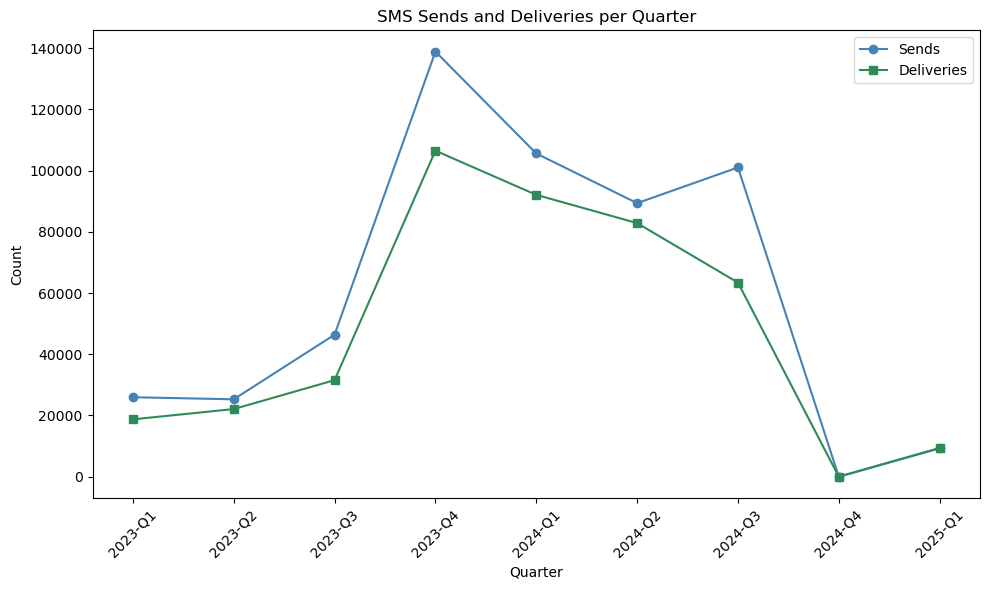

In [38]:
sms_df = sms_quarterly.toPandas()

# Plot Sends and Deliveries
plt.figure(figsize=(10, 6))
plt.plot(sms_df['YEAR_QUARTER'], sms_df['SENDS'], marker='o', label='Sends', color='steelblue')
plt.plot(sms_df['YEAR_QUARTER'], sms_df['DELIVERIES'], marker='s', label='Deliveries', color='seagreen')

plt.title('SMS Sends and Deliveries per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(False)
plt.legend()
plt.ticklabel_format(style='plain', axis='y')  # Disable 1e7 formatting
plt.tight_layout()
plt.show()

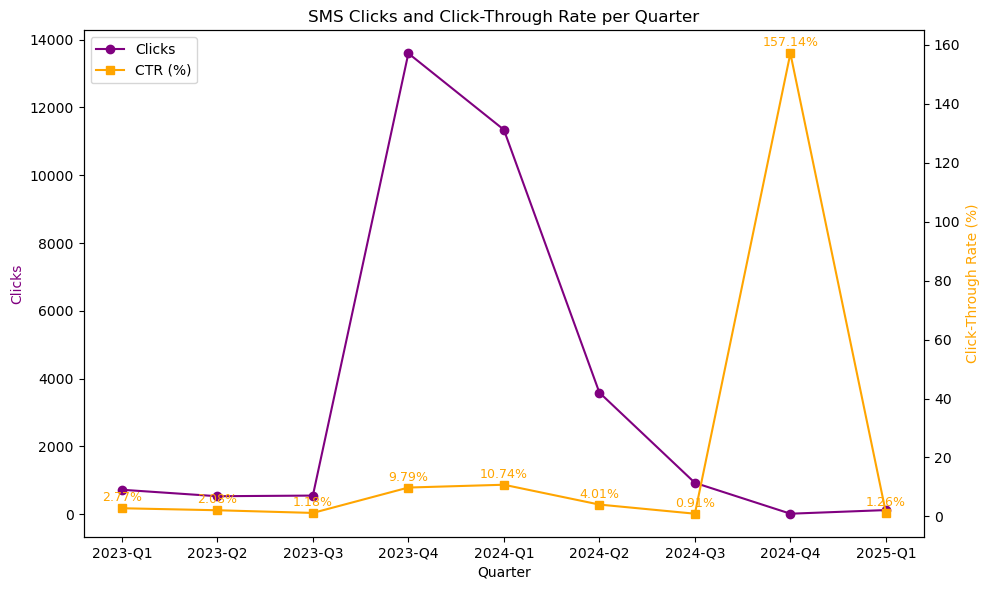

In [39]:
# Plot Clicks and CTR (Dual Axis)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot Clicks and CTR
ax1.plot(sms_df['YEAR_QUARTER'], sms_df['CLICKS'], marker='o', label='Clicks', color='purple')
ax2.plot(sms_df['YEAR_QUARTER'], sms_df['CLICK_THROUGH_RATE'], marker='s', label='CTR (%)', color='orange')

# Annotate CTR values on data points
for i, (x, y) in enumerate(zip(sms_df['YEAR_QUARTER'], sms_df['CLICK_THROUGH_RATE'])):
    ax2.annotate(f"{y:.2f}%", xy=(x, y), xytext=(0, 5), textcoords="offset points",
                 ha='center', fontsize=9, color='orange')

# Axis labels and title
ax1.set_xlabel("Quarter")
ax1.set_ylabel("Clicks", color='purple')
ax2.set_ylabel("Click-Through Rate (%)", color='orange')
plt.title("SMS Clicks and Click-Through Rate per Quarter")

# Tidy up
ax1.ticklabel_format(style='plain', axis='y')  # Disable scientific notation
ax1.grid(False)
ax2.grid(False)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
df_sms_send = df_sms_send.join(df_app_groups, on="APP_GROUP_ID", how="left").select(
    "APP_GROUP_NAME", "USER_ID", "TIME", "YEAR_QUARTER"
)

df_sms_send_grouped = df_sms_send.groupBy("APP_GROUP_NAME").agg(
    count("*").alias("TOTAL_SMS_SENDS"),
    countDistinct("USER_ID").alias("UNIQUE_USERS_REACHED_SMS")
)

df_sms_delivery = df_sms_delivery.join(df_app_groups, on="APP_GROUP_ID", how="left").select(
    "APP_GROUP_NAME", "USER_ID", "TIME", "YEAR_QUARTER"
)
df_sms_delivery_grouped = df_sms_delivery.groupBy("APP_GROUP_NAME").agg(
    count("*").alias("TOTAL_SMS_DELIVERIES"),
    countDistinct("USER_ID").alias("UNIQUE_USERS_DELIVERED_SMS")
)

df_sms_click = df_sms_click.join(df_app_groups, on="APP_GROUP_ID", how="left").select(
    "APP_GROUP_NAME", "USER_ID", "TIME", "YEAR_QUARTER"
)
df_sms_click_grouped = df_sms_click.groupBy("APP_GROUP_NAME").agg(
    count("*").alias("TOTAL_SMS_CLICKS"),
    countDistinct("USER_ID").alias("UNIQUE_USERS_CLICKED_SMS")
)

df_sms_metrics_by_group = df_sms_send_grouped \
    .join(df_sms_delivery_grouped, on="APP_GROUP_NAME", how="left") \
    .join(df_sms_click_grouped, on="APP_GROUP_NAME", how="left")

df_sms_metrics_by_group.show(truncate=False)


+---------------------+---------------+------------------------+--------------------+--------------------------+----------------+------------------------+
|APP_GROUP_NAME       |TOTAL_SMS_SENDS|UNIQUE_USERS_REACHED_SMS|TOTAL_SMS_DELIVERIES|UNIQUE_USERS_DELIVERED_SMS|TOTAL_SMS_CLICKS|UNIQUE_USERS_CLICKED_SMS|
+---------------------+---------------+------------------------+--------------------+--------------------------+----------------+------------------------+
|Mammalians Nurturable|321180         |70695                   |246339              |64129                     |28541           |11034                   |
|Optics and Design    |220670         |17436                   |180165              |16921                     |2827            |1432                    |
+---------------------+---------------+------------------------+--------------------+--------------------------+----------------+------------------------+



In [11]:
df_sms_send = df_sms_send.withColumn("DATE", to_date(from_unixtime(col("TIME"))))
df_sms_send = df_sms_send.withColumn("YEAR_QUARTER", date_format(col("DATE"), "yyyy-'Q'q"))

df_sms_delivery = df_sms_delivery.withColumn("DATE", to_date(from_unixtime(col("TIME"))))
df_sms_delivery = df_sms_delivery.withColumn("YEAR_QUARTER", date_format(col("DATE"), "yyyy-'Q'q"))

df_sms_click = df_sms_click.withColumn("DATE", to_date(from_unixtime(col("TIME"))))
df_sms_click = df_sms_click.withColumn("YEAR_QUARTER", date_format(col("DATE"), "yyyy-'Q'q"))

df_sms_send_grouped_quarterly = df_sms_send.groupBy("APP_GROUP_NAME", "YEAR_QUARTER").agg(
    count("*").alias("TOTAL_SMS_SENDS"),
    countDistinct("USER_ID").alias("UNIQUE_SMS_SEND_USERS")
)

# Total SMS Deliveries and Unique Users Delivered SMS by App Group and Quarter
df_sms_delivery_grouped_quarterly = df_sms_delivery.groupBy("APP_GROUP_NAME", "YEAR_QUARTER").agg(
    count("*").alias("TOTAL_SMS_DELIVERIES"),
    countDistinct("USER_ID").alias("UNIQUE_SMS_DELIVERY_USERS")
)

# Total SMS Clicks and Unique Users Who Clicked SMS by App Group and Quarter
df_sms_click_grouped_quarterly = df_sms_click.groupBy("APP_GROUP_NAME", "YEAR_QUARTER").agg(
    count("*").alias("TOTAL_SMS_CLICKS"),
    countDistinct("USER_ID").alias("UNIQUE_SMS_CLICK_USERS")
)

df_sms_metrics_by_group_quarter = df_sms_send_grouped_quarterly \
    .join(df_sms_delivery_grouped_quarterly, on=["APP_GROUP_NAME", "YEAR_QUARTER"], how="left") \
    .join(df_sms_click_grouped_quarterly, on=["APP_GROUP_NAME", "YEAR_QUARTER"], how="left")

df_sms_metrics_by_group_quarter = df_sms_metrics_by_group_quarter.withColumn(
    "SMS_CTR", round((col("TOTAL_SMS_CLICKS") / col("TOTAL_SMS_SENDS")) * 100, 3)
)

df_sms_metrics_by_group_quarter = df_sms_metrics_by_group_quarter.orderBy("YEAR_QUARTER", ascending=True)

df_sms_metrics_by_group_quarter.show(truncate=False)


+---------------------+------------+---------------+---------------------+--------------------+-------------------------+----------------+----------------------+-------+
|APP_GROUP_NAME       |YEAR_QUARTER|TOTAL_SMS_SENDS|UNIQUE_SMS_SEND_USERS|TOTAL_SMS_DELIVERIES|UNIQUE_SMS_DELIVERY_USERS|TOTAL_SMS_CLICKS|UNIQUE_SMS_CLICK_USERS|SMS_CTR|
+---------------------+------------+---------------+---------------------+--------------------+-------------------------+----------------+----------------------+-------+
|Mammalians Nurturable|2023-Q1     |793            |748                  |782                 |737                      |null            |null                  |null   |
|Optics and Design    |2023-Q1     |25173          |7754                 |17962               |6667                     |718             |450                   |2.852  |
|Optics and Design    |2023-Q2     |22171          |5584                 |19031               |4476                     |527             |369         

### WhatsApp Metrics
---

In [12]:
df_whatsapp_send = spark.read.csv("gs://brazecase-data/USERS_MESSAGES_WHATSAPP_SEND.csv", header=True, inferSchema=True)

total_whatsapp_sends = df_whatsapp_send.count()

unique_whatsapp_send_users = df_whatsapp_send.select("USER_ID").distinct().count()

df_whatsapp_send = df_whatsapp_send.withColumn("DATE", to_date(from_unixtime(col("TIME"))))
df_whatsapp_send = df_whatsapp_send.withColumn("YEAR_QUARTER", date_format(col("DATE"), "yyyy-'Q'q"))

In [13]:
df_whatsapp_delivery = spark.read.csv("gs://brazecase-data/USERS_MESSAGES_WHATSAPP_DELIVERY.csv", header=True, inferSchema=True)

total_whatsapp_delivered = df_whatsapp_delivery.count()

unique_whatsapp_delivered_users = df_whatsapp_delivery.select("USER_ID").distinct().count()

df_whatsapp_delivery = df_whatsapp_delivery.withColumn("DATE", to_date(from_unixtime(col("TIME"))))
df_whatsapp_delivery = df_whatsapp_delivery.withColumn("YEAR_QUARTER", date_format(col("DATE"), "yyyy-'Q'q"))

In [14]:
total_whatsapp_sends = df_whatsapp_send.count()

unique_whatsapp_send_users = df_whatsapp_send.select("USER_ID").distinct().count()

total_whatsapp_deliveries = df_whatsapp_delivery.count()

unique_whatsapp_delivery_users = df_whatsapp_delivery.select("USER_ID").distinct().count()

whatsapp_delivery_rate = (total_whatsapp_deliveries / total_whatsapp_sends) * 100

print("Total WhatsApp Sends:", total_whatsapp_sends)
print("Unique Users Sent To:", unique_whatsapp_send_users)
print("Total WhatsApp Deliveries:", total_whatsapp_deliveries)
print("Unique Users Delivered To:", unique_whatsapp_delivery_users)
print(f"WhatsApp Delivery Rate: {whatsapp_delivery_rate:.2f}%")

Total WhatsApp Sends: 1573318
Unique Users Sent To: 356903
Total WhatsApp Deliveries: 1304042
Unique Users Delivered To: 320928
WhatsApp Delivery Rate: 82.88%


In [15]:
whatsapp_quarterly = df_whatsapp_send.groupBy("YEAR_QUARTER").agg(
    count("*").alias("SENDS")
).join(
    df_whatsapp_delivery.groupBy("YEAR_QUARTER").agg(count("*").alias("DELIVERIES")),
    on="YEAR_QUARTER", how="outer"
)

whatsapp_quarterly = whatsapp_quarterly.withColumn(
    "DELIVERY_RATE", (col("DELIVERIES") / col("SENDS")) * 100
)

whatsapp_quarterly = whatsapp_quarterly.orderBy("YEAR_QUARTER")

whatsapp_quarterly.show(truncate=False)

+------------+------+----------+-----------------+
|YEAR_QUARTER|SENDS |DELIVERIES|DELIVERY_RATE    |
+------------+------+----------+-----------------+
|2023-Q3     |284018|248724    |87.5733228175679 |
|2023-Q4     |701379|573314    |81.74097028853159|
|2024-Q1     |24237 |22263     |91.85542765193712|
|2024-Q2     |158505|92265     |58.20952020440996|
|2024-Q3     |83960 |75360     |89.75702715578848|
|2024-Q4     |263357|240536    |91.33457625960199|
|2025-Q1     |57862 |51580     |89.14313366285299|
+------------+------+----------+-----------------+



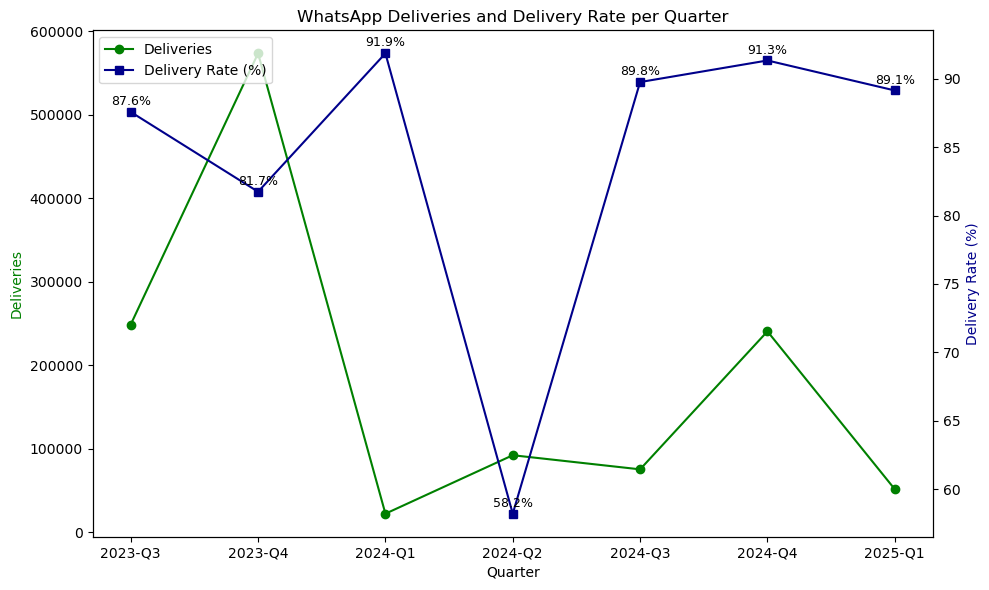

In [16]:
whatsapp_df = whatsapp_quarterly.toPandas()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot Deliveries and Delivery Rate
ax1.plot(whatsapp_df['YEAR_QUARTER'], whatsapp_df['DELIVERIES'], marker='o', label='Deliveries', color='green')
ax2.plot(whatsapp_df['YEAR_QUARTER'], whatsapp_df['DELIVERY_RATE'], marker='s', label='Delivery Rate (%)', color='darkblue')

# Labels and title
ax1.set_xlabel("Quarter")
ax1.set_ylabel("Deliveries", color='green')
ax2.set_ylabel("Delivery Rate (%)", color='darkblue')
plt.title("WhatsApp Deliveries and Delivery Rate per Quarter")

# Format y-axis and disable grid
ax1.ticklabel_format(style='plain', axis='y')
ax1.grid(False)
ax2.grid(False)

# Add data labels to delivery rate line
for i, rate in enumerate(whatsapp_df['DELIVERY_RATE']):
    ax2.annotate(f"{rate:.1f}%", (whatsapp_df['YEAR_QUARTER'][i], rate),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=9)

# Legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
df_whatsapp_send = df_whatsapp_send.withColumn("DATE", to_date(from_unixtime(col("TIME"))))
df_whatsapp_send = df_whatsapp_send.withColumn("YEAR_QUARTER", date_format(col("DATE"), "yyyy-'Q'q"))

df_whatsapp_delivery = df_whatsapp_delivery.withColumn("DATE", to_date(from_unixtime(col("TIME"))))
df_whatsapp_delivery = df_whatsapp_delivery.withColumn("YEAR_QUARTER", date_format(col("DATE"), "yyyy-'Q'q"))

df_whatsapp_send = df_whatsapp_send.join(df_app_groups, on="APP_GROUP_ID", how="left") \
    .select("APP_GROUP_NAME", "USER_ID", "TIME", "YEAR_QUARTER")

df_whatsapp_send_grouped = df_whatsapp_send.groupBy("APP_GROUP_NAME").agg(
    count("*").alias("TOTAL_WHATSAPP_SENDS"),
    countDistinct("USER_ID").alias("UNIQUE_WHATSAPP_SEND_USERS")
)

df_whatsapp_delivery = df_whatsapp_delivery.join(df_app_groups, on="APP_GROUP_ID", how="left") \
    .select("APP_GROUP_NAME", "USER_ID", "TIME", "YEAR_QUARTER")
df_whatsapp_delivery_grouped = df_whatsapp_delivery.groupBy("APP_GROUP_NAME").agg(
    count("*").alias("TOTAL_WHATSAPP_DELIVERIES"),
    countDistinct("USER_ID").alias("UNIQUE_WHATSAPP_DELIVERY_USERS")
)

df_whatsapp_metrics_by_group = df_whatsapp_send_grouped \
    .join(df_whatsapp_delivery_grouped, on="APP_GROUP_NAME", how="left")

df_whatsapp_metrics_by_group = df_whatsapp_metrics_by_group.withColumn(
    "DELIVERY_RATE", round((col("TOTAL_WHATSAPP_DELIVERIES") / col("TOTAL_WHATSAPP_SENDS")) * 100, 3)
)

df_whatsapp_metrics_by_group.show(truncate=False)


+---------------------+--------------------+--------------------------+-------------------------+------------------------------+-------------+
|APP_GROUP_NAME       |TOTAL_WHATSAPP_SENDS|UNIQUE_WHATSAPP_SEND_USERS|TOTAL_WHATSAPP_DELIVERIES|UNIQUE_WHATSAPP_DELIVERY_USERS|DELIVERY_RATE|
+---------------------+--------------------+--------------------------+-------------------------+------------------------------+-------------+
|Mammalians Nurturable|154005              |80633                     |85776                    |63620                         |55.697       |
|Optics and Design    |1419313             |276270                    |1218266                  |257308                        |85.835       |
+---------------------+--------------------+--------------------------+-------------------------+------------------------------+-------------+



In [19]:
df_whatsapp_send_grouped_quarterly = df_whatsapp_send.groupBy("APP_GROUP_NAME", "YEAR_QUARTER").agg(
    count("*").alias("TOTAL_WHATSAPP_SENDS"),
    countDistinct("USER_ID").alias("UNIQUE_WHATSAPP_SEND_USERS")
)

df_whatsapp_delivery_grouped_quarterly = df_whatsapp_delivery.groupBy("APP_GROUP_NAME", "YEAR_QUARTER").agg(
    count("*").alias("TOTAL_WHATSAPP_DELIVERIES"),
    countDistinct("USER_ID").alias("UNIQUE_WHATSAPP_DELIVERY_USERS")
)

df_whatsapp_metrics_by_group_quarter = df_whatsapp_send_grouped_quarterly \
    .join(df_whatsapp_delivery_grouped_quarterly, on=["APP_GROUP_NAME", "YEAR_QUARTER"], how="left")

df_whatsapp_metrics_by_group_quarter = df_whatsapp_metrics_by_group_quarter.withColumn(
    "DELIVERY_RATE", round((col("TOTAL_WHATSAPP_DELIVERIES") / col("TOTAL_WHATSAPP_SENDS")) * 100, 3)
)

df_whatsapp_metrics_by_group_quarter = df_whatsapp_metrics_by_group_quarter.orderBy("YEAR_QUARTER", ascending=True)

df_whatsapp_metrics_by_group_quarter.show(truncate=False)


+---------------------+------------+--------------------+--------------------------+-------------------------+------------------------------+-------------+
|APP_GROUP_NAME       |YEAR_QUARTER|TOTAL_WHATSAPP_SENDS|UNIQUE_WHATSAPP_SEND_USERS|TOTAL_WHATSAPP_DELIVERIES|UNIQUE_WHATSAPP_DELIVERY_USERS|DELIVERY_RATE|
+---------------------+------------+--------------------+--------------------------+-------------------------+------------------------------+-------------+
|Optics and Design    |2023-Q3     |284018              |50204                     |248724                   |46232                         |87.573       |
|Mammalians Nurturable|2023-Q4     |753                 |488                       |694                      |439                           |92.165       |
|Optics and Design    |2023-Q4     |700626              |74053                     |572620                   |65118                         |81.73        |
|Mammalians Nurturable|2024-Q1     |5156                |1615   

## Other Analysis and Purchase Revenue Analysis
---

### Revenue Analysis
---

In [2]:
df_purchase = spark.read.csv("gs://brazecase-data/USERS_BEHAVIORS_PURCHASE.csv", header=True, inferSchema=True)

numeric_columns = ["PRICE"]

numeric_stats = df_purchase.select(numeric_columns).describe()

numeric_stats.show(truncate=False)

categorical_columns = ["SOURCE", "DEVICE_ID", "PLATFORM", "APP_GROUP_ID"]

categorical_stats = {}
for column in categorical_columns:
    distinct_values = df_purchase.select(column).distinct().count()
    categorical_stats[column] = distinct_values

print("Categorical Column Stats (Distinct Values Count):")
for column, count_values in categorical_stats.items():
    print(f"{column}: {count_values} distinct values")


+-------+-----------------+
|summary|PRICE            |
+-------+-----------------+
|count  |50982273         |
|mean   |36.98119002221787|
|stddev |865.108023118544 |
|min    |-500.0           |
|max    |503280.0         |
+-------+-----------------+



Categorical Column Stats (Distinct Values Count):
SOURCE: 1 distinct values
DEVICE_ID: 574846 distinct values
PLATFORM: 4 distinct values
APP_GROUP_ID: 2 distinct values


In [2]:
df_returns = df_purchase.filter(col("PRICE") < 0)


In [5]:
df_purchase = df_purchase.withColumn("TIME_TIMESTAMP", col("TIME").cast("timestamp"))
df_returns = df_returns.withColumn("TIME_TIMESTAMP", col("TIME").cast("timestamp"))

df_purchase = df_purchase.withColumn("TIME_UNIX", unix_timestamp("TIME_TIMESTAMP"))
df_returns = df_returns.withColumn("TIME_UNIX", unix_timestamp("TIME_TIMESTAMP"))

time_diff_threshold = 30 * 24 * 60 * 60  

df_refunds = df_returns.join(
    df_purchase,
    (df_returns.USER_ID == df_purchase.USER_ID) &  # Match the same user
    (abs(df_returns.TIME_UNIX - df_purchase.TIME_UNIX) <= time_diff_threshold),  # Match within 30 days
    "inner"
)

df_refunds.show()


25/04/05 17:28:45 WARN YarnAllocator: Container from a bad node: container_1743872969410_0001_01_000001 on host: single-spark332-m.us-central1-f.c.braze-case-project.internal. Exit status: 143. Diagnostics: [2025-04-05 17:28:45.688]Container killed on request. Exit code is 143
[2025-04-05 17:28:45.689]Container exited with a non-zero exit code 143. 
[2025-04-05 17:28:45.689]Killed by external signal
.
25/04/05 17:28:45 WARN YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 1 for reason Container from a bad node: container_1743872969410_0001_01_000001 on host: single-spark332-m.us-central1-f.c.braze-case-project.internal. Exit status: 143. Diagnostics: [2025-04-05 17:28:45.688]Container killed on request. Exit code is 143
[2025-04-05 17:28:45.689]Container exited with a non-zero exit code 143. 
[2025-04-05 17:28:45.689]Killed by external signal
.
25/04/05 17:28:45 ERROR YarnScheduler: Lost executor 1 on single-spark332-m.us-central1-f.c.braze-case-project.

+--------------------+----------+--------+---------+------+------+--------+--------------------+-------------------+----------+--------------------+----------+--------+---------+------+-----+--------+--------------------+-------------------+----------+
|             USER_ID|      TIME|CURRENCY|DEVICE_ID|SOURCE| PRICE|PLATFORM|        APP_GROUP_ID|     TIME_TIMESTAMP| TIME_UNIX|             USER_ID|      TIME|CURRENCY|DEVICE_ID|SOURCE|PRICE|PLATFORM|        APP_GROUP_ID|     TIME_TIMESTAMP| TIME_UNIX|
+--------------------+----------+--------+---------+------+------+--------+--------------------+-------------------+----------+--------------------+----------+--------+---------+------+-----+--------+--------------------+-------------------+----------+
|6c098bac799b06134...|1712169996|     USD|     null|  null|-140.0|    null|67d8beaa788702c9d17b|2024-04-03 18:46:36|1712169996|6c098bac799b06134...|1713370875|     USD|     null|  null|200.0|    null|67d8beaa788702c9d17b|2024-04-17 16:21:15|

In [1]:
df_purchase = spark.read.csv("gs://brazecase-data/USERS_BEHAVIORS_PURCHASE.csv", header=True, inferSchema=True)
df_purchase = df_purchase.filter(col("PRICE") >= 0)


In [5]:
df_purchase = df_purchase.withColumn("PRICE", col("PRICE").cast("float"))

lifetime_revenue = df_purchase.agg(sum("PRICE")).first()[0]

print(f"Lifetime Revenue: ${lifetime_revenue:,.2f}")

Lifetime Revenue: $1,886,519,160.60


In [6]:
df_session_start = spark.read.csv("gs://brazecase-data/USERS_BEHAVIORS_APP_SESSIONSTART.csv", header=True, inferSchema=True)

total_users = df_session_start.select("USER_ID").distinct().count()

lifetime_value_per_user = lifetime_revenue / total_users

print(f"Lifetime Value Per User: ${lifetime_value_per_user:,.2f}")


Lifetime Value Per User: $320.60


In [7]:
df_purchase = df_purchase.withColumn("PRICE", F.col("PRICE").cast("double"))

df_total_revenue = df_purchase.groupBy("USER_ID", "APP_GROUP_ID").agg(
    F.sum("PRICE").alias("TOTAL_REVENUE")
)

df_total_revenue_per_group = df_total_revenue.groupBy("APP_GROUP_ID").agg(
    F.sum("TOTAL_REVENUE").alias("TOTAL_REVENUE_PER_GROUP")
)

df_unique_users_per_group = df_session_start.groupBy("APP_GROUP_ID").agg(
    F.countDistinct("USER_ID").alias("UNIQUE_USERS")
)

df_ltv = df_total_revenue_per_group.join(df_unique_users_per_group, on="APP_GROUP_ID", how="left")

df_ltv = df_ltv.withColumn("LTV_PER_USER", F.col("TOTAL_REVENUE_PER_GROUP") / F.col("UNIQUE_USERS"))

df_app_groups = spark.read.csv("gs://brazecase-data/APP_GROUPS_VIEW.csv", header=True, inferSchema=True)
df_ltv_with_names = df_ltv.join(df_app_groups, on="APP_GROUP_ID", how="left")

df_ltv_with_names.select("APP_GROUP_NAME", "LTV_PER_USER").show(truncate=False)


+---------------------+------------------+
|APP_GROUP_NAME       |LTV_PER_USER      |
+---------------------+------------------+
|Optics and Design    |135.79899660641854|
|Mammalians Nurturable|565.5016391762027 |
+---------------------+------------------+



In [20]:

df_session_start = spark.read.csv("gs://brazecase-data/USERS_BEHAVIORS_APP_SESSIONSTART.csv", header=True, inferSchema=True)

df_session_start_with_date = df_session_start.withColumn("DATE", to_date(col("TIME").cast("timestamp")))

daily_active_users = df_session_start_with_date.groupBy("DATE").agg(countDistinct("USER_ID").alias("DAUs"))

daily_active_users.show(truncate=False)


+----------+-----+
|DATE      |DAUs |
+----------+-----+
|2023-07-15|26426|
|2023-06-22|23087|
|2024-09-18|48699|
|2025-02-16|46676|
|2023-05-22|24104|
|2023-09-14|31303|
|2024-02-05|43053|
|2024-06-04|43084|
|2024-05-30|58595|
|2023-11-08|27322|
|2024-06-12|53007|
|2024-08-27|52785|
|2023-06-18|25077|
|2023-09-19|28812|
|2023-11-22|30631|
|2024-11-02|53345|
|2024-10-24|42540|
|2025-02-01|59038|
|2024-11-25|70151|
|2024-05-25|52301|
+----------+-----+
only showing top 20 rows



In [21]:
from pyspark.sql.functions import to_date, col, sum, countDistinct

df_purchase_with_date = df_purchase.withColumn("DATE", to_date(col("TIME").cast("timestamp")))

daily_revenue = df_purchase_with_date.groupBy("DATE").agg(sum("PRICE").alias("DAILY_REVENUE"))

daily_revenue_per_user = daily_revenue.join(daily_active_users, on="DATE", how="inner")

daily_revenue_per_user = daily_revenue_per_user.withColumn("DAILY_REVENUE_PER_USER", col("DAILY_REVENUE") / col("DAUs"))

average_dru = daily_revenue_per_user.agg({"DAILY_REVENUE_PER_USER": "avg"}).collect()[0][0]

print(f"Average Daily Revenue Per User: ${average_dru:,.2f}")


Average Daily Revenue Per User: $62.77


In [15]:
daily_revenue_by_group = df_purchase_with_group.groupBy("APP_GROUP_NAME", "DATE").agg(sum("PRICE").alias("DAILY_REVENUE"))

total_daily_revenue_by_group = daily_revenue_by_group.groupBy("APP_GROUP_NAME").agg(sum("DAILY_REVENUE").alias("TOTAL_DAILY_REVENUE"))
total_unique_days_by_group = daily_revenue_by_group.groupBy("APP_GROUP_NAME").agg(countDistinct("DATE").alias("TOTAL_UNIQUE_DAYS"))

average_daily_revenue_by_group = total_daily_revenue_by_group.join(total_unique_days_by_group, on="APP_GROUP_NAME", how="inner")
average_daily_revenue_by_group = average_daily_revenue_by_group.withColumn(
    "AVERAGE_DAILY_REVENUE", col("TOTAL_DAILY_REVENUE") / col("TOTAL_UNIQUE_DAYS")
).drop("TOTAL_DAILY_REVENUE")  # Drop the Total Daily Revenue column

average_daily_revenue_by_group.show(truncate=False)

+---------------------+-----------------+---------------------+
|APP_GROUP_NAME       |TOTAL_UNIQUE_DAYS|AVERAGE_DAILY_REVENUE|
+---------------------+-----------------+---------------------+
|Mammalians Nurturable|731              |1957727.9948253585   |
|Optics and Design    |725              |628165.5122567902    |
+---------------------+-----------------+---------------------+



In [16]:
daily_purchases_by_group = df_purchase_with_group.groupBy("APP_GROUP_NAME", "DATE").agg(countDistinct("USER_ID").alias("DAILY_PURCHASES"))

total_daily_purchases_by_group = daily_purchases_by_group.groupBy("APP_GROUP_NAME").agg(sum("DAILY_PURCHASES").alias("TOTAL_DAILY_PURCHASES"))
total_unique_days_purchases_by_group = daily_purchases_by_group.groupBy("APP_GROUP_NAME").agg(countDistinct("DATE").alias("TOTAL_UNIQUE_DAYS"))

average_daily_purchases_by_group = total_daily_purchases_by_group.join(total_unique_days_purchases_by_group, on="APP_GROUP_NAME", how="inner")
average_daily_purchases_by_group = average_daily_purchases_by_group.withColumn("AVERAGE_DAILY_PURCHASES", 
                                                                               col("TOTAL_DAILY_PURCHASES") / col("TOTAL_UNIQUE_DAYS"))
average_daily_purchases_by_group.show(truncate=False)

+---------------------+---------------------+-----------------+-----------------------+
|APP_GROUP_NAME       |TOTAL_DAILY_PURCHASES|TOTAL_UNIQUE_DAYS|AVERAGE_DAILY_PURCHASES|
+---------------------+---------------------+-----------------+-----------------------+
|Mammalians Nurturable|21644332             |731              |29609.20930232558      |
|Optics and Design    |1473638              |725              |2032.6041379310345     |
+---------------------+---------------------+-----------------+-----------------------+



In [4]:
df_purchase_with_date = df_purchase.withColumn("DATE", to_date(col("TIME").cast("timestamp")))
df_session_start_with_date = df_session_start.withColumn("DATE", to_date(col("TIME").cast("timestamp")))

df_purchase_with_group = df_purchase_with_date.join(df_app_groups, on="APP_GROUP_ID", how="left")

df_session_start_with_group = df_session_start_with_date.join(df_app_groups, on="APP_GROUP_ID", how="left")

daily_active_users_by_group = df_session_start_with_group.groupBy("APP_GROUP_NAME", "DATE").agg(countDistinct("USER_ID").alias("DAUs"))

daily_revenue_by_group = df_purchase_with_group.groupBy("APP_GROUP_NAME", "DATE").agg(sum("PRICE").alias("DAILY_REVENUE"))

daily_revenue_per_user_by_group = daily_revenue_by_group.join(daily_active_users_by_group, on=["APP_GROUP_NAME", "DATE"], how="inner")

daily_revenue_per_user_by_group = daily_revenue_per_user_by_group.withColumn(
    "DAILY_REVENUE_PER_USER", 
    col("DAILY_REVENUE") / col("DAUs")
)

average_dru_by_group = daily_revenue_per_user_by_group.groupBy("APP_GROUP_NAME").agg(
    sum("DAILY_REVENUE_PER_USER").alias("TOTAL_DAILY_REVENUE_PER_USER"),
    countDistinct("DATE").alias("TOTAL_DAYS")
)

average_dru_by_group = average_dru_by_group.withColumn(
    "AVERAGE_DAILY_REVENUE_PER_USER", 
    col("TOTAL_DAILY_REVENUE_PER_USER") / col("TOTAL_DAYS")
).drop("TOTAL_DAILY_REVENUE_PER_USER", "TOTAL_DAYS")

average_dru_by_group.show(truncate=False)


+---------------------+------------------------------+
|APP_GROUP_NAME       |AVERAGE_DAILY_REVENUE_PER_USER|
+---------------------+------------------------------+
|Mammalians Nurturable|64.99761779698237             |
|Optics and Design    |47.108632044787115            |
+---------------------+------------------------------+



In [17]:
# Step 1: Convert TIME to timestamp and add YEAR_QUARTER to the session start data
df_session_start_with_group = df_session_start.withColumn(
    "YEAR_QUARTER", 
    date_format(from_unixtime(col("TIME")), "yyyy-'Q'q")
)

# Step 2: Add a DATE column by extracting the date part from the TIME column
df_session_start_with_group = df_session_start_with_group.withColumn(
    "DATE", 
    to_date(from_unixtime(col("TIME")))
)

# Step 3: Calculate DAUs from session start data (grouped by YEAR_QUARTER and DATE)
daily_active_users_by_quarter = df_session_start_with_group.groupBy("YEAR_QUARTER", "DATE").agg(countDistinct("USER_ID").alias("DAUs"))

# Step 4: Calculate daily revenue by quarter (already calculated from the purchase data)
daily_revenue_by_quarter = df_purchase_with_quarter.groupBy("YEAR_QUARTER", "DATE").agg(sum("PRICE").alias("DAILY_REVENUE"))

# Step 5: Join daily revenue and DAUs by year-quarter and date
daily_revenue_per_user_by_quarter = daily_revenue_by_quarter.join(daily_active_users_by_quarter, on=["YEAR_QUARTER", "DATE"], how="inner")

# Step 6: Calculate DRPU by dividing daily revenue by DAUs
daily_revenue_per_user_by_quarter = daily_revenue_per_user_by_quarter.withColumn(
    "DAILY_REVENUE_PER_USER", 
    col("DAILY_REVENUE") / col("DAUs")
)

# Step 7: Calculate the average DRPU across all days in the quarter
average_dru_per_quarter = daily_revenue_per_user_by_quarter.groupBy("YEAR_QUARTER").agg(
    sum("DAILY_REVENUE_PER_USER").alias("TOTAL_DAILY_REVENUE_PER_USER"),
    countDistinct("DATE").alias("TOTAL_DAYS")
)

# Step 8: Calculate the average DRPU by dividing total daily revenue per user by total days
average_dru_per_quarter = average_dru_per_quarter.withColumn(
    "AVERAGE_DAILY_REVENUE_PER_USER", 
    col("TOTAL_DAILY_REVENUE_PER_USER") / col("TOTAL_DAYS")
).drop("TOTAL_DAILY_REVENUE_PER_USER", "TOTAL_DAYS")

# Step 9: Join all the metrics into a single DataFrame for quarterly metrics
quarterly_metrics_per_quarter = quarterly_revenue_per_quarter.join(
    average_daily_revenue_per_quarter, on="YEAR_QUARTER", how="inner"
).join(
    average_daily_purchases_per_quarter, on="YEAR_QUARTER", how="inner"
).join(
    average_dru_per_quarter, on="YEAR_QUARTER", how="inner"
)

# Show the final table with all quarterly metrics
quarterly_metrics_per_quarter.show(truncate=False)


+------------+--------------------+--------------------+-----------------+------------------+---------------------+-----------------+-------------------+------------------------------+
|YEAR_QUARTER|QUARTERLY_REVENUE   |TOTAL_DAILY_REVENUE |TOTAL_UNIQUE_DAYS|AVG_DAILY_REVENUE |TOTAL_DAILY_PURCHASES|TOTAL_UNIQUE_DAYS|AVG_DAILY_PURCHASES|AVERAGE_DAILY_REVENUE_PER_USER|
+------------+--------------------+--------------------+-----------------+------------------+---------------------+-----------------+-------------------+------------------------------+
|2024-Q2     |2.9335392944994015E8|2.933539294499998E8 |91               |3223669.554395602 |4091791              |91               |44964.73626373626  |62.271497310511755            |
|2024-Q4     |3.692926680798431E8 |3.692926680799998E8 |92               |4014050.739999998 |4663402              |92               |50689.15217391304  |76.90710977039171             |
|2025-Q1     |2.2171041118996015E8|2.2171041118999994E8|59               |3

In [23]:
# Step 1: Join df_session_start with df_app_groups to get APP_GROUP_NAME
df_session_start_with_group_name = df_session_start.join(
    df_app_groups, 
    on="APP_GROUP_ID", 
    how="inner"
)

# Step 2: Convert TIME to timestamp and add YEAR_QUARTER to the session start data
df_session_start_with_group_name = df_session_start_with_group_name.withColumn(
    "YEAR_QUARTER", 
    date_format(from_unixtime(col("TIME")), "yyyy-'Q'q")
)

# Step 3: Add a DATE column by extracting the date part from the TIME column
df_session_start_with_group_name = df_session_start_with_group_name.withColumn(
    "DATE", 
    to_date(from_unixtime(col("TIME")))
)

# Step 4: Calculate DAUs from session start data (grouped by YEAR_QUARTER, APP_GROUP_NAME, and DATE)
daily_active_users_by_quarter_and_group = df_session_start_with_group_name.groupBy(
    "YEAR_QUARTER", "APP_GROUP_NAME", "DATE"
).agg(countDistinct("USER_ID").alias("DAUs"))

# Step 5: Calculate daily revenue by quarter and app group (already calculated from the purchase data)
daily_revenue_by_quarter_and_group = df_purchase_with_quarter.groupBy(
    "YEAR_QUARTER", "APP_GROUP_NAME", "DATE"
).agg(sum("PRICE").alias("DAILY_REVENUE"))

# Step 6: Join daily revenue and DAUs by year-quarter, app-group-name, and date
daily_revenue_per_user_by_quarter_and_group = daily_revenue_by_quarter_and_group.join(
    daily_active_users_by_quarter_and_group, 
    on=["YEAR_QUARTER", "APP_GROUP_NAME", "DATE"], 
    how="inner"
)

# Step 7: Calculate DRPU by dividing daily revenue by DAUs
daily_revenue_per_user_by_quarter_and_group = daily_revenue_per_user_by_quarter_and_group.withColumn(
    "DAILY_REVENUE_PER_USER", 
    col("DAILY_REVENUE") / col("DAUs")
)

# Step 8: Calculate the average DRPU across all days in the quarter and app group
average_dru_per_quarter_and_group = daily_revenue_per_user_by_quarter_and_group.groupBy(
    "YEAR_QUARTER", "APP_GROUP_NAME"
).agg(
    sum("DAILY_REVENUE_PER_USER").alias("TOTAL_DAILY_REVENUE_PER_USER"),
    countDistinct("DATE").alias("TOTAL_DAYS")
)

# Step 9: Calculate the average DRPU by dividing total daily revenue per user by total days
average_dru_per_quarter_and_group = average_dru_per_quarter_and_group.withColumn(
    "AVERAGE_DAILY_REVENUE_PER_USER", 
    col("TOTAL_DAILY_REVENUE_PER_USER") / col("TOTAL_DAYS")
).drop("TOTAL_DAILY_REVENUE_PER_USER", "TOTAL_DAYS")

# Step 10: Join all the metrics into a single DataFrame for quarterly metrics, by App Group
quarterly_metrics_by_quarter_and_group = quarterly_revenue_per_quarter_and_group.join(
    average_daily_revenue_per_quarter_and_group, on=["YEAR_QUARTER", "APP_GROUP_NAME"], how="inner"
).join(
    average_daily_purchases_per_quarter_and_group, on=["YEAR_QUARTER", "APP_GROUP_NAME"], how="inner"
).join(
    average_dru_per_quarter_and_group, on=["YEAR_QUARTER", "APP_GROUP_NAME"], how="inner"
)

# Step 11: Sort by YEAR_QUARTER to get the desired order
quarterly_metrics_by_quarter_and_group = quarterly_metrics_by_quarter_and_group.orderBy("YEAR_QUARTER")

# Step 12: Show the final table with all quarterly metrics by App Group
quarterly_metrics_by_quarter_and_group.show(truncate=False)


+------------+---------------------+--------------------+--------------------+-----------------+------------------+---------------------+-----------------+-------------------+------------------------------+
|YEAR_QUARTER|APP_GROUP_NAME       |QUARTERLY_REVENUE   |TOTAL_DAILY_REVENUE |TOTAL_UNIQUE_DAYS|AVG_DAILY_REVENUE |TOTAL_DAILY_PURCHASES|TOTAL_UNIQUE_DAYS|AVG_DAILY_PURCHASES|AVERAGE_DAILY_REVENUE_PER_USER|
+------------+---------------------+--------------------+--------------------+-----------------+------------------+---------------------+-----------------+-------------------+------------------------------+
|2023-Q1     |Mammalians Nurturable|3613584.4597146306  |3613584.4597146166  |31               |116567.24063595537|110368               |31               |3560.2580645161293 |25.486517864410203            |
|2023-Q1     |Optics and Design    |7.310597312063482E7 |7.310597312063488E7 |27               |2707628.6340975882|16883                |27               |625.2962962962963

### Conversion Analysis
---

#### Campaign Conversion Analysis
---

In [7]:
df_campaign_conversion = spark.read.csv("gs://brazecase-data/USERS_CAMPAIGNS_CONVERSION.csv", header=True, inferSchema=True)

total_conversions = df_campaign_conversion.agg(countDistinct("USER_ID").alias("TOTAL_CONVERSIONS")).collect()[0][0]

# Aggregate total sends for each campaign from the send tables (using countDistinct to count unique sends)
push_send_total = df_push_send.filter(col("CAMPAIGN_ID").isNotNull()).groupBy("CAMPAIGN_ID").agg(countDistinct("USER_ID").alias("PUSH_SENDS"))
email_send_total = df_email_send.filter(col("CAMPAIGN_ID").isNotNull()).groupBy("CAMPAIGN_ID").agg(countDistinct("USER_ID").alias("EMAIL_SENDS"))
contentcard_send_total = df_contentcard_send.filter(col("CAMPAIGN_ID").isNotNull()).groupBy("CAMPAIGN_ID").agg(countDistinct("USER_ID").alias("CONTENTCARD_SENDS"))
inappmessage_send_total = df_inappmessage_send.filter(col("CAMPAIGN_ID").isNotNull()).groupBy("CAMPAIGN_ID").agg(countDistinct("USER_ID").alias("INAPPMESSAGE_SENDS"))
whatsapp_send_total = df_whatsapp_send.filter(col("CAMPAIGN_ID").isNotNull()).groupBy("CAMPAIGN_ID").agg(countDistinct("USER_ID").alias("WHATSAPP_SENDS"))
sms_send_total = df_sms_send.filter(col("CAMPAIGN_ID").isNotNull()).groupBy("CAMPAIGN_ID").agg(countDistinct("USER_ID").alias("SMS_SENDS"))

# Join all the sends data on CAMPAIGN_ID
total_sends_by_campaign = push_send_total \
    .join(email_send_total, on="CAMPAIGN_ID", how="outer") \
    .join(contentcard_send_total, on="CAMPAIGN_ID", how="outer") \
    .join(inappmessage_send_total, on="CAMPAIGN_ID", how="outer") \
    .join(whatsapp_send_total, on="CAMPAIGN_ID", how="outer") \
    .join(sms_send_total, on="CAMPAIGN_ID", how="outer") \
    .fillna(0)  # Fill missing values with 0 for each campaign

# Calculate total sends by summing up all send columns
total_sends_by_campaign = total_sends_by_campaign.withColumn(
    "TOTAL_SENDS", 
    col("PUSH_SENDS") + col("EMAIL_SENDS") + col("CONTENTCARD_SENDS") + col("INAPPMESSAGE_SENDS") + col("WHATSAPP_SENDS") + col("SMS_SENDS")
)

total_sends = total_sends_by_campaign.agg({"TOTAL_SENDS": "sum"}).collect()[0][0]
overall_conversion_rate = total_conversions / total_sends

print(f"Overall Campaign Conversion Rate: {overall_conversion_rate:.4f}")

Overall Campaign Conversion Rate: 0.0544


In [5]:
total_sends_by_campaign = push_send_total \
    .join(email_send_total, on="CAMPAIGN_ID", how="outer") \
    .join(contentcard_send_total, on="CAMPAIGN_ID", how="outer") \
    .join(inappmessage_send_total, on="CAMPAIGN_ID", how="outer") \
    .join(whatsapp_send_total, on="CAMPAIGN_ID", how="outer") \
    .join(sms_send_total, on="CAMPAIGN_ID", how="outer") \
    .fillna(0) 

total_sends_by_campaign = total_sends_by_campaign.withColumn(
    "TOTAL_SENDS", 
    col("PUSH_SENDS") + col("EMAIL_SENDS") + col("CONTENTCARD_SENDS") + col("INAPPMESSAGE_SENDS") + col("WHATSAPP_SENDS") + col("SMS_SENDS")
)

total_sends_with_names = total_sends_by_campaign.join(
    df_campaign_view, on="CAMPAIGN_ID", how="left"
)

total_sends_with_names.select(
    "CAMPAIGN_ID", "CAMPAIGN_NAME", "TOTAL_SENDS"
).orderBy("TOTAL_SENDS", ascending=False).show(truncate=False)


+----------------------------------------------------------------+-------------------------------+-----------+
|CAMPAIGN_ID                                                     |CAMPAIGN_NAME                  |TOTAL_SENDS|
+----------------------------------------------------------------+-------------------------------+-----------+
|6ca2c8132b2c7a06b4f83aafb3a797b50049a6c1018896d88fe5983dbeb8ffac|Give a Birthday Nod - Push     |2147340    |
|da8e0c057854320113a495fc6ff0e49430069e28d578d1536da6c26f86291641|Special Offer                  |1969704    |
|1f38de65c4b094b1f6d0e5890fd48647a9aaec202c9bce55b410ca859883de0a|Welcome New Loyalty Members    |1876274    |
|09c15017a631b6497eac1710cf0629df8e046ec3f544ebfa3e797a483462319e|Personalized Content           |1755880    |
|null                                                            |null                           |1666249    |
|fa6ac2044e5cd5f7caebb133557fb5e60cba22468cffe8ad3c1844323122adb5|Join us on Social Media        |1534192    |
|

In [2]:
conversions_per_campaign = df_campaign_conversion.groupBy("CAMPAIGN_ID").agg(countDistinct("USER_ID").alias("NUMBER_OF_CONVERSIONS"))

conversions_per_campaign_with_details = conversions_per_campaign.join(
    df_campaign_view, on="CAMPAIGN_ID", how="inner"
)

conversions_per_campaign_with_details.select(
    "CAMPAIGN_ID", "CAMPAIGN_NAME", "CAMPAIGN_TYPE", "SCHEDULE_TYPE", "NUMBER_OF_CONVERSIONS"
).orderBy("NUMBER_OF_CONVERSIONS", ascending=False).show(truncate=False)

+----------------------------------------------------------------+-----------------------------+--------------+-------------+---------------------+
|CAMPAIGN_ID                                                     |CAMPAIGN_NAME                |CAMPAIGN_TYPE |SCHEDULE_TYPE|NUMBER_OF_CONVERSIONS|
+----------------------------------------------------------------+-----------------------------+--------------+-------------+---------------------+
|e8cc66540a213146aed679996c2bee5dec5053cd59fb88acabc90604db64c1f4|Free Gift                    |email         |api_triggered|644387               |
|49002e23267464e50e371167abb79c4a24ff2c7e2c079fcbcea1e6ecdd0f00d2|Premiering Now               |in_app_message|action_based |392311               |
|da8e0c057854320113a495fc6ff0e49430069e28d578d1536da6c26f86291641|Special Offer                |push          |api_triggered|349311               |
|745367b7e594bcb275c07408179e3c48717e85c3811ca1a42bed9b47a542179b|Upcoming Additions           |email         |a

In [10]:
df_campaign_view_renamed = df_campaign_view.withColumnRenamed("CAMPAIGN_NAME", "CAMPAIGN_NAME_VIEW")

final_result = total_sends_with_names.join(
    conversions_per_campaign_with_details, 
    on="CAMPAIGN_ID", 
    how="inner"
)

final_result = final_result.join(
    df_campaign_view_renamed, 
    on="CAMPAIGN_ID", 
    how="inner"
)

final_result = final_result.withColumn(
    "CONVERSION_RATE", 
    col("NUMBER_OF_CONVERSIONS") / col("TOTAL_SENDS")
)

final_result.select(
    "CAMPAIGN_ID", "CAMPAIGN_NAME_VIEW", "TOTAL_SENDS", "NUMBER_OF_CONVERSIONS", "CONVERSION_RATE"
).orderBy("CONVERSION_RATE", ascending=False).show(truncate=False)


+----------------------------------------------------------------+------------------------------------+-----------+---------------------+-------------------+
|CAMPAIGN_ID                                                     |CAMPAIGN_NAME_VIEW                  |TOTAL_SENDS|NUMBER_OF_CONVERSIONS|CONVERSION_RATE    |
+----------------------------------------------------------------+------------------------------------+-----------+---------------------+-------------------+
|84c00cdf793dafe8b14696fcfed5d1a4d5254ef8910f32c8da2f6d4745aea136|Confirm Email                       |156027     |250008               |1.6023380568747716 |
|e8cc66540a213146aed679996c2bee5dec5053cd59fb88acabc90604db64c1f4|Free Gift                           |418598     |644387               |1.539393403695192  |
|745367b7e594bcb275c07408179e3c48717e85c3811ca1a42bed9b47a542179b|Upcoming Additions                  |300776     |344217               |1.144429741734713  |
|a48966a401b38b889ca05113e7931e57b4b5a3341bee6382da6

In [11]:
push_send_total_app_group = df_push_send.groupBy("APP_GROUP_ID").agg(countDistinct("USER_ID").alias("PUSH_SENDS"))
email_send_total_app_group = df_email_send.groupBy("APP_GROUP_ID").agg(countDistinct("USER_ID").alias("EMAIL_SENDS"))
contentcard_send_total_app_group = df_contentcard_send.groupBy("APP_GROUP_ID").agg(countDistinct("USER_ID").alias("CONTENTCARD_SENDS"))
inappmessage_send_total_app_group = df_inappmessage_send.groupBy("APP_GROUP_ID").agg(countDistinct("USER_ID").alias("INAPPMESSAGE_SENDS"))
whatsapp_send_total_app_group = df_whatsapp_send.groupBy("APP_GROUP_ID").agg(countDistinct("USER_ID").alias("WHATSAPP_SENDS"))
sms_send_total_app_group = df_sms_send.groupBy("APP_GROUP_ID").agg(countDistinct("USER_ID").alias("SMS_SENDS"))

# Join all the sends data on APP_GROUP_ID
total_sends_by_app_group = push_send_total_app_group \
    .join(email_send_total_app_group, on="APP_GROUP_ID", how="outer") \
    .join(contentcard_send_total_app_group, on="APP_GROUP_ID", how="outer") \
    .join(inappmessage_send_total_app_group, on="APP_GROUP_ID", how="outer") \
    .join(whatsapp_send_total_app_group, on="APP_GROUP_ID", how="outer") \
    .join(sms_send_total_app_group, on="APP_GROUP_ID", how="outer") \
    .fillna(0)  # Fill missing values with 0 for each app group

# Calculate total sends by summing up all send columns
total_sends_by_app_group = total_sends_by_app_group.withColumn(
    "TOTAL_SENDS", 
    col("PUSH_SENDS") + col("EMAIL_SENDS") + col("CONTENTCARD_SENDS") + col("INAPPMESSAGE_SENDS") + col("WHATSAPP_SENDS") + col("SMS_SENDS")
)

# Join the total sends with the APP_GROUPS_VIEW table to get app group names
total_sends_with_names_app_group = total_sends_by_app_group.join(
    df_app_groups_view, on="APP_GROUP_ID", how="left"
)

# Group by APP_GROUP_ID and count distinct USER_IDs to calculate conversions
conversions_per_app_group = df_campaign_conversion.groupBy("APP_GROUP_ID").agg(countDistinct("USER_ID").alias("NUMBER_OF_CONVERSIONS"))

# Join the conversion result with the app group names
final_result_app_group = total_sends_with_names_app_group.join(
    conversions_per_app_group, on="APP_GROUP_ID", how="left"
)

# Calculate the conversion rate for each app group
final_result_app_group = final_result_app_group.withColumn(
    "CONVERSION_RATE", 
    col("NUMBER_OF_CONVERSIONS") / col("TOTAL_SENDS")
)

# Show the result with APP_GROUP_ID, APP_GROUP_NAME, TOTAL_SENDS, NUMBER_OF_CONVERSIONS, and CONVERSION_RATE
final_result_app_group.select(
    "APP_GROUP_ID", "APP_GROUP_NAME", "COMPANY_NAME", "TOTAL_SENDS", "NUMBER_OF_CONVERSIONS", "CONVERSION_RATE"
).orderBy("CONVERSION_RATE", ascending=False).show(truncate=False)


+--------------------+---------------------+----------------+-----------+---------------------+------------------+
|APP_GROUP_ID        |APP_GROUP_NAME       |COMPANY_NAME    |TOTAL_SENDS|NUMBER_OF_CONVERSIONS|CONVERSION_RATE   |
+--------------------+---------------------+----------------+-----------+---------------------+------------------+
|67d8beaa788702c9d17b|Mammalians Nurturable|Cobel Industries|4597453    |914265               |0.1988633706532726|
|67d8bede1cbedfea26c5|Optics and Design    |Cobel Industries|2925659    |293236               |0.1002290424140339|
|null                |null                 |null            |1          |null                 |null              |
+--------------------+---------------------+----------------+-----------+---------------------+------------------+



In [4]:
df_push_send_filtered = df_push_send.filter(col("COUNTRY").isNotNull())
df_email_send_filtered = df_email_send.filter(col("COUNTRY").isNotNull())
df_contentcard_send_filtered = df_contentcard_send.filter(col("COUNTRY").isNotNull())
df_inappmessage_send_filtered = df_inappmessage_send.filter(col("COUNTRY").isNotNull())
df_sms_send_filtered = df_sms_send.filter(col("COUNTRY").isNotNull())

push_send_total_country = df_push_send_filtered.groupBy("COUNTRY").agg(countDistinct("USER_ID").alias("PUSH_SENDS"))
email_send_total_country = df_email_send_filtered.groupBy("COUNTRY").agg(countDistinct("USER_ID").alias("EMAIL_SENDS"))
contentcard_send_total_country = df_contentcard_send_filtered.groupBy("COUNTRY").agg(countDistinct("USER_ID").alias("CONTENTCARD_SENDS"))
inappmessage_send_total_country = df_inappmessage_send_filtered.groupBy("COUNTRY").agg(countDistinct("USER_ID").alias("INAPPMESSAGE_SENDS"))
sms_send_total_country = df_sms_send_filtered.groupBy("COUNTRY").agg(countDistinct("USER_ID").alias("SMS_SENDS"))

# Join all the sends data on COUNTRY
total_sends_by_country = push_send_total_country \
    .join(email_send_total_country, on="COUNTRY", how="outer") \
    .join(contentcard_send_total_country, on="COUNTRY", how="outer") \
    .join(inappmessage_send_total_country, on="COUNTRY", how="outer") \
    .join(sms_send_total_country, on="COUNTRY", how="outer") \
    .fillna(0)  # Fill missing values with 0 for each country

# Calculate total sends by summing up all send columns
total_sends_by_country = total_sends_by_country.withColumn(
    "TOTAL_SENDS", 
    col("PUSH_SENDS") + col("EMAIL_SENDS") + col("CONTENTCARD_SENDS") + col("INAPPMESSAGE_SENDS") + col("SMS_SENDS")
)

# Join the total sends with the conversions data (already filtered and aggregated)
final_result_country = total_sends_by_country.join(
    conversions_per_country, on="COUNTRY", how="inner"
)

# Calculate the conversion rate for each country
final_result_country = final_result_country.withColumn(
    "CONVERSION_RATE", 
    col("NUMBER_OF_CONVERSIONS") / col("TOTAL_SENDS")
)

# Show the result with COUNTRY, TOTAL_SENDS, NUMBER_OF_CONVERSIONS, and CONVERSION_RATE
final_result_country.select(
    "COUNTRY", "TOTAL_SENDS", "NUMBER_OF_CONVERSIONS", "CONVERSION_RATE"
).orderBy("TOTAL_SENDS", ascending=False).show(truncate=False)


+-------+-----------+---------------------+-------------------+
|COUNTRY|TOTAL_SENDS|NUMBER_OF_CONVERSIONS|CONVERSION_RATE    |
+-------+-----------+---------------------+-------------------+
|US     |2304353    |345571               |0.14996443687230213|
|AT     |1719185    |488333               |0.28404912792980397|
|ID     |1669661    |130790               |0.07833326645348966|
|BR     |646636     |71795                |0.11102846114351815|
|CO     |269997     |77810                |0.28818838727837714|
|AU     |50472      |8171                 |0.16189174195593597|
|VE     |49427      |9076                 |0.18362433487769841|
|MX     |42346      |6239                 |0.1473338686062438 |
|SG     |36360      |5916                 |0.1627062706270627 |
|MY     |23415      |2294                 |0.09797138586376254|
|AR     |16243      |4007                 |0.24669088222618973|
|DO     |15862      |3121                 |0.19675955112848317|
|DE     |15790      |7289               

In [7]:
# Read the relevant tables
df_push_send = spark.read.csv("gs://brazecase-data/USERS_MESSAGES_PUSHNOTIFICATION_SEND.csv", header=True, inferSchema=True)
df_email_send = spark.read.csv("gs://brazecase-data/USERS_MESSAGES_EMAIL_SEND.csv", header=True, inferSchema=True)
df_contentcard_send = spark.read.csv("gs://brazecase-data/USERS_MESSAGES_CONTENTCARD_SEND.csv", header=True, inferSchema=True)
df_inappmessage_send = spark.read.csv("gs://brazecase-data/USERS_MESSAGES_INAPPMESSAGE_IMPRESSION.csv", header=True, inferSchema=True)
df_sms_send = spark.read.csv("gs://brazecase-data/USERS_MESSAGES_SMS_SEND.csv", header=True, inferSchema=True)
df_campaign_conversion = spark.read.csv("gs://brazecase-data/USERS_CAMPAIGNS_CONVERSION.csv", header=True, inferSchema=True)

# If TIME is an integer Unix timestamp, convert it to a timestamp first
df_push_send = df_push_send.withColumn("TIME_TIMESTAMP", from_unixtime(col("TIME")))  # Convert TIME to timestamp
df_email_send = df_email_send.withColumn("TIME_TIMESTAMP", from_unixtime(col("TIME")))
df_contentcard_send = df_contentcard_send.withColumn("TIME_TIMESTAMP", from_unixtime(col("TIME")))
df_inappmessage_send = df_inappmessage_send.withColumn("TIME_TIMESTAMP", from_unixtime(col("TIME")))
df_sms_send = df_sms_send.withColumn("TIME_TIMESTAMP", from_unixtime(col("TIME")))
df_campaign_conversion = df_campaign_conversion.withColumn("TIME_TIMESTAMP", from_unixtime(col("TIME")))

# Now that we have the timestamp, extract the year and quarter
df_push_send = df_push_send.withColumn("YEAR_QUARTER", concat_ws("-", year(col("TIME_TIMESTAMP")), quarter(col("TIME_TIMESTAMP"))))
df_email_send = df_email_send.withColumn("YEAR_QUARTER", concat_ws("-", year(col("TIME_TIMESTAMP")), quarter(col("TIME_TIMESTAMP"))))
df_contentcard_send = df_contentcard_send.withColumn("YEAR_QUARTER", concat_ws("-", year(col("TIME_TIMESTAMP")), quarter(col("TIME_TIMESTAMP"))))
df_inappmessage_send = df_inappmessage_send.withColumn("YEAR_QUARTER", concat_ws("-", year(col("TIME_TIMESTAMP")), quarter(col("TIME_TIMESTAMP"))))
df_sms_send = df_sms_send.withColumn("YEAR_QUARTER", concat_ws("-", year(col("TIME_TIMESTAMP")), quarter(col("TIME_TIMESTAMP"))))
df_campaign_conversion = df_campaign_conversion.withColumn("YEAR_QUARTER", concat_ws("-", year(col("TIME_TIMESTAMP")), quarter(col("TIME_TIMESTAMP"))))

# Aggregate total sends by year and quarter
push_send_total_quarter = df_push_send.groupBy("YEAR_QUARTER").agg(countDistinct("USER_ID").alias("PUSH_SENDS"))
email_send_total_quarter = df_email_send.groupBy("YEAR_QUARTER").agg(countDistinct("USER_ID").alias("EMAIL_SENDS"))
contentcard_send_total_quarter = df_contentcard_send.groupBy("YEAR_QUARTER").agg(countDistinct("USER_ID").alias("CONTENTCARD_SENDS"))
inappmessage_send_total_quarter = df_inappmessage_send.groupBy("YEAR_QUARTER").agg(countDistinct("USER_ID").alias("INAPPMESSAGE_SENDS"))
sms_send_total_quarter = df_sms_send.groupBy("YEAR_QUARTER").agg(countDistinct("USER_ID").alias("SMS_SENDS"))

# Join all the sends data on YEAR_QUARTER
total_sends_by_quarter = push_send_total_quarter \
    .join(email_send_total_quarter, on="YEAR_QUARTER", how="outer") \
    .join(contentcard_send_total_quarter, on="YEAR_QUARTER", how="outer") \
    .join(inappmessage_send_total_quarter, on="YEAR_QUARTER", how="outer") \
    .join(sms_send_total_quarter, on="YEAR_QUARTER", how="outer") \
    .fillna(0)  # Fill missing values with 0 for each quarter

# Calculate total sends by summing up all send columns
total_sends_by_quarter = total_sends_by_quarter.withColumn(
    "TOTAL_SENDS", 
    col("PUSH_SENDS") + col("EMAIL_SENDS") + col("CONTENTCARD_SENDS") + col("INAPPMESSAGE_SENDS") + col("SMS_SENDS")
)

# Aggregate total conversions by year and quarter
conversions_per_quarter = df_campaign_conversion.groupBy("YEAR_QUARTER").agg(countDistinct("USER_ID").alias("NUMBER_OF_CONVERSIONS"))

# Join the total sends with the conversions data (already aggregated)
final_result_quarter = total_sends_by_quarter.join(
    conversions_per_quarter, on="YEAR_QUARTER", how="left"
)

# Calculate the conversion rate for each quarter
final_result_quarter = final_result_quarter.withColumn(
    "CONVERSION_RATE", 
    col("NUMBER_OF_CONVERSIONS") / col("TOTAL_SENDS")
)

# Show the result with YEAR_QUARTER, TOTAL_SENDS, NUMBER_OF_CONVERSIONS, and CONVERSION_RATE
final_result_quarter.select(
    "YEAR_QUARTER", "TOTAL_SENDS", "NUMBER_OF_CONVERSIONS", "CONVERSION_RATE"
).orderBy("YEAR_QUARTER", ascending=True).show(truncate=False)


+------------+-----------+---------------------+-------------------+
|YEAR_QUARTER|TOTAL_SENDS|NUMBER_OF_CONVERSIONS|CONVERSION_RATE    |
+------------+-----------+---------------------+-------------------+
|2023-1      |473436     |66788                |0.14107080999332539|
|2023-2      |938836     |193395               |0.20599444418407475|
|2023-3      |1281269    |232593               |0.1815333079938717 |
|2023-4      |1717714    |302838               |0.1763029235367471 |
|2024-1      |2345927    |369613               |0.15755520099304027|
|2024-2      |2571305    |432022               |0.1680166296880378 |
|2024-3      |2823706    |453291               |0.16053052265356238|
|2024-4      |2687666    |501842               |0.18672037373691522|
|2025-1      |2109671    |334693               |0.15864701178524993|
+------------+-----------+---------------------+-------------------+



#### Canvas Conversion Analysis
---

In [1]:
df_canvas_conversion = spark.read.csv("gs://brazecase-data/USERS_CANVAS_CONVERSION.csv", header=True, inferSchema=True)
df_experimentstep_conversion = spark.read.csv("gs://brazecase-data/USERS_CANVAS_EXPERIMENTSTEP_CONVERSION.csv", header=True, inferSchema=True)

In [18]:
canvas_conversion_per_canvas = df_canvas_conversion.groupBy("CANVAS_ID").agg(countDistinct("USER_ID").alias("CANVAS_CONVERSIONS"))

push_send_total_canvas = df_push_send.groupBy("CANVAS_ID").agg(countDistinct("USER_ID").alias("PUSH_SENDS"))
email_send_total_canvas = df_email_send.groupBy("CANVAS_ID").agg(countDistinct("USER_ID").alias("EMAIL_SENDS"))
contentcard_send_total_canvas = df_contentcard_send.groupBy("CANVAS_ID").agg(countDistinct("USER_ID").alias("CONTENTCARD_SENDS"))
inappmessage_send_total_canvas = df_inappmessage_send.groupBy("CANVAS_ID").agg(countDistinct("USER_ID").alias("INAPPMESSAGE_SENDS"))
sms_send_total_canvas = df_sms_send.groupBy("CANVAS_ID").agg(countDistinct("USER_ID").alias("SMS_SENDS"))

total_sends_by_canvas = push_send_total_canvas \
    .join(email_send_total_canvas, on="CANVAS_ID", how="outer") \
    .join(contentcard_send_total_canvas, on="CANVAS_ID", how="outer") \
    .join(inappmessage_send_total_canvas, on="CANVAS_ID", how="outer") \
    .join(sms_send_total_canvas, on="CANVAS_ID", how="outer") \
    .fillna(0)  # Fill missing values with 0 for each canvas

# Calculate total sends by summing up all send columns
total_sends_by_canvas = total_sends_by_canvas.withColumn(
    "TOTAL_SENDS", 
    col("PUSH_SENDS") + col("EMAIL_SENDS") + col("CONTENTCARD_SENDS") + col("INAPPMESSAGE_SENDS") + col("SMS_SENDS")
)

# Join the total sends with the Canvas Conversion data (aggregated by CANVAS_ID)
canvas_final_result = total_sends_by_canvas.join(
    canvas_conversion_per_canvas, on="CANVAS_ID", how="left"
)

# Join the workflows view table to get additional information about the canvas
canvas_final_result = canvas_final_result.join(
    df_workflows_view, on="CANVAS_ID", how="left"
)

# Calculate the conversion rate for each Canvas
canvas_final_result = canvas_final_result.withColumn(
    "CANVAS_CONVERSION_RATE", 
    col("CANVAS_CONVERSIONS") / col("TOTAL_SENDS")
)

# Show the result with CANVAS_ID, CANVAS_NAME, SCHEDULE_TYPE, CHANNELS_USED, TOTAL_SENDS, CANVAS_CONVERSIONS, and CANVAS_CONVERSION_RATE
canvas_final_result.select(
    "CANVAS_ID", "NAME", "SCHEDULE_TYPE", "CHANNELS_USED", "TOTAL_SENDS", "CANVAS_CONVERSIONS", "CANVAS_CONVERSION_RATE"
).orderBy("TOTAL_SENDS", ascending=False).show(truncate=False)


+----------------------------------------------------------------+---------------------------------+-------------+----------------------------------------------+-----------+------------------+----------------------+
|CANVAS_ID                                                       |NAME                             |SCHEDULE_TYPE|CHANNELS_USED                                 |TOTAL_SENDS|CANVAS_CONVERSIONS|CANVAS_CONVERSION_RATE|
+----------------------------------------------------------------+---------------------------------+-------------+----------------------------------------------+-----------+------------------+----------------------+
|null                                                            |null                             |null         |null                                          |1893891    |null              |null                  |
|null                                                            |null                             |null         |null                  

In [4]:
df_push_send = df_push_send.withColumn("TIME_TIMESTAMP", from_unixtime(col("TIME")))  # Convert TIME to timestamp
df_email_send = df_email_send.withColumn("TIME_TIMESTAMP", from_unixtime(col("TIME")))
df_contentcard_send = df_contentcard_send.withColumn("TIME_TIMESTAMP", from_unixtime(col("TIME")))
df_inappmessage_send = df_inappmessage_send.withColumn("TIME_TIMESTAMP", from_unixtime(col("TIME")))
df_sms_send = df_sms_send.withColumn("TIME_TIMESTAMP", from_unixtime(col("TIME")))
df_whatsapp_send = df_whatsapp_send.withColumn("TIME_TIMESTAMP", from_unixtime(col("TIME")))
df_canvas_conversion = df_canvas_conversion.withColumn("TIME_TIMESTAMP", from_unixtime(col("TIME")))

# Add year and quarter columns
df_push_send = df_push_send.withColumn("YEAR", year(col("TIME_TIMESTAMP"))).withColumn("QUARTER", quarter(col("TIME_TIMESTAMP")))
df_email_send = df_email_send.withColumn("YEAR", year(col("TIME_TIMESTAMP"))).withColumn("QUARTER", quarter(col("TIME_TIMESTAMP")))
df_contentcard_send = df_contentcard_send.withColumn("YEAR", year(col("TIME_TIMESTAMP"))).withColumn("QUARTER", quarter(col("TIME_TIMESTAMP")))
df_inappmessage_send = df_inappmessage_send.withColumn("YEAR", year(col("TIME_TIMESTAMP"))).withColumn("QUARTER", quarter(col("TIME_TIMESTAMP")))
df_sms_send = df_sms_send.withColumn("YEAR", year(col("TIME_TIMESTAMP"))).withColumn("QUARTER", quarter(col("TIME_TIMESTAMP")))
df_whatsapp_send = df_whatsapp_send.withColumn("YEAR", year(col("TIME_TIMESTAMP"))).withColumn("QUARTER", quarter(col("TIME_TIMESTAMP")))
df_canvas_conversion = df_canvas_conversion.withColumn("YEAR", year(col("TIME_TIMESTAMP"))).withColumn("QUARTER", quarter(col("TIME_TIMESTAMP")))

# Create a single YEAR_QUARTER column (e.g., 2023-Q1)
df_push_send = df_push_send.withColumn("YEAR_QUARTER", concat_ws("-", col("YEAR"), col("QUARTER")))
df_email_send = df_email_send.withColumn("YEAR_QUARTER", concat_ws("-", col("YEAR"), col("QUARTER")))
df_contentcard_send = df_contentcard_send.withColumn("YEAR_QUARTER", concat_ws("-", col("YEAR"), col("QUARTER")))
df_inappmessage_send = df_inappmessage_send.withColumn("YEAR_QUARTER", concat_ws("-", col("YEAR"), col("QUARTER")))
df_sms_send = df_sms_send.withColumn("YEAR_QUARTER", concat_ws("-", col("YEAR"), col("QUARTER")))
df_whatsapp_send = df_whatsapp_send.withColumn("YEAR_QUARTER", concat_ws("-", col("YEAR"), col("QUARTER")))
df_canvas_conversion = df_canvas_conversion.withColumn("YEAR_QUARTER", concat_ws("-", col("YEAR"), col("QUARTER")))

# Aggregate total conversions from the Canvas Conversion table by YEAR_QUARTER (across all canvases)
canvas_conversion_per_quarter = df_canvas_conversion.groupBy("YEAR_QUARTER").agg(countDistinct("USER_ID").alias("CANVAS_CONVERSIONS"))

# Aggregate total sends by YEAR_QUARTER for each send channel (including WhatsApp)
push_send_total = df_push_send.groupBy("YEAR_QUARTER").agg(countDistinct("USER_ID").alias("PUSH_SENDS"))
email_send_total = df_email_send.groupBy("YEAR_QUARTER").agg(countDistinct("USER_ID").alias("EMAIL_SENDS"))
contentcard_send_total = df_contentcard_send.groupBy("YEAR_QUARTER").agg(countDistinct("USER_ID").alias("CONTENTCARD_SENDS"))
inappmessage_send_total = df_inappmessage_send.groupBy("YEAR_QUARTER").agg(countDistinct("USER_ID").alias("INAPPMESSAGE_SENDS"))
sms_send_total = df_sms_send.groupBy("YEAR_QUARTER").agg(countDistinct("USER_ID").alias("SMS_SENDS"))
whatsapp_send_total = df_whatsapp_send.groupBy("YEAR_QUARTER").agg(countDistinct("USER_ID").alias("WHATSAPP_SENDS"))

# Join all the sends data on YEAR_QUARTER
total_sends_by_quarter = push_send_total \
    .join(email_send_total, on="YEAR_QUARTER", how="outer") \
    .join(contentcard_send_total, on="YEAR_QUARTER", how="outer") \
    .join(inappmessage_send_total, on="YEAR_QUARTER", how="outer") \
    .join(sms_send_total, on="YEAR_QUARTER", how="outer") \
    .join(whatsapp_send_total, on="YEAR_QUARTER", how="outer") \
    .fillna(0)  # Fill missing values with 0 for each quarter

# Calculate total sends by summing up all send columns (now including WhatsApp)
total_sends_by_quarter = total_sends_by_quarter.withColumn(
    "TOTAL_SENDS", 
    col("PUSH_SENDS") + col("EMAIL_SENDS") + col("CONTENTCARD_SENDS") + col("INAPPMESSAGE_SENDS") + col("SMS_SENDS") + col("WHATSAPP_SENDS")
)

# Join the total sends with the Canvas Conversion data (aggregated by YEAR_QUARTER)
canvas_final_result = total_sends_by_quarter.join(
    canvas_conversion_per_quarter, on="YEAR_QUARTER", how="left"
)

# Calculate the conversion rate for each quarter
canvas_final_result = canvas_final_result.withColumn(
    "CANVAS_CONVERSION_RATE", 
    col("CANVAS_CONVERSIONS") / col("TOTAL_SENDS")
)

# Show the result with YEAR_QUARTER, TOTAL_SENDS, CANVAS_CONVERSIONS, and CANVAS_CONVERSION_RATE
canvas_final_result.select(
    "YEAR_QUARTER", "TOTAL_SENDS", "CANVAS_CONVERSIONS", "CANVAS_CONVERSION_RATE"
).orderBy("YEAR_QUARTER", ascending=True).show(truncate=False)


+------------+-----------+------------------+----------------------+
|YEAR_QUARTER|TOTAL_SENDS|CANVAS_CONVERSIONS|CANVAS_CONVERSION_RATE|
+------------+-----------+------------------+----------------------+
|2023-1      |473436     |12125             |0.02561064219873436   |
|2023-2      |938836     |61082             |0.06506141647742524   |
|2023-3      |1331473    |116463            |0.08746929152900584   |
|2023-4      |1792255    |161767            |0.09025891962918223   |
|2024-1      |2361462    |234002            |0.09909200317430474   |
|2024-2      |2674607    |269015            |0.10058113210651135   |
|2024-3      |2884642    |251333            |0.08712796943260204   |
|2024-4      |2830691    |234815            |0.0829532435719759    |
|2025-1      |2158070    |176214            |0.0816535144828481    |
+------------+-----------+------------------+----------------------+



In [10]:
from pyspark.sql import functions as F

# Load necessary tables
canvas_step = spark.read.option("header", True).csv("gs://brazecase-data/CANVAS_STEP.csv")

# 1. Calculate Total Steps per Campaign (i.e., number of steps per canvas)
canvas_steps = canvas_step.groupBy("CANVAS_ID").agg(F.countDistinct("CANVAS_STEP_ID").alias("NUM_STEPS"))

# 2. Calculate the average number of steps across all campaigns using Spark's aggregate function
avg_steps = canvas_steps.agg(F.avg("NUM_STEPS").alias("AVG_STEPS"))

# Show the average steps
avg_steps.show()


+-----------------+
|        AVG_STEPS|
+-----------------+
|40.78846153846154|
+-----------------+



In [3]:
from pyspark.sql import functions as F

# Load necessary tables
canvas_step = spark.read.option("header", True).csv("gs://brazecase-data/CANVAS_STEP.csv")
canvas_conversion = spark.read.option("header", True).csv("gs://brazecase-data/USERS_CANVAS_CONVERSION.csv")
email_sends = spark.read.option("header", True).csv("gs://brazecase-data/USERS_MESSAGES_EMAIL_SEND.csv")
push_sends = spark.read.option("header", True).csv("gs://brazecase-data/USERS_MESSAGES_PUSHNOTIFICATION_SEND.csv")
whatsapp_sends = spark.read.option("header", True).csv("gs://brazecase-data/USERS_MESSAGES_WHATSAPP_SEND.csv")
inapp_sends = spark.read.option("header", True).csv("gs://brazecase-data/USERS_MESSAGES_INAPPMESSAGE_IMPRESSION.csv")
contentcard_sends = spark.read.option("header", True).csv("gs://brazecase-data/USERS_MESSAGES_CONTENTCARD_SEND.csv")
sms_sends = spark.read.option("header", True).csv("gs://brazecase-data/USERS_MESSAGES_SMS_SEND.csv")

# 1. Combine all the send data into one and count distinct CANVAS_ID across all send channels
all_sends_combined = email_sends.select("CANVAS_ID") \
    .union(push_sends.select("CANVAS_ID")) \
    .union(whatsapp_sends.select("CANVAS_ID")) \
    .union(inapp_sends.select("CANVAS_ID")) \
    .union(contentcard_sends.select("CANVAS_ID")) \
    .union(sms_sends.select("CANVAS_ID"))

# Count the distinct CANVAS_ID across all sends
distinct_canvases_sent = all_sends_combined.distinct().count()

# Print the total number of distinct canvases that have been sent across any channel
print(f"Total number of distinct canvases sent across all channels: {distinct_canvases_sent}")

# 2. Count the total number of sends (not distinct users) for each canvas
all_sends = email_sends.select("CANVAS_ID", "USER_ID") \
    .union(push_sends.select("CANVAS_ID", "USER_ID")) \
    .union(whatsapp_sends.select("CANVAS_ID", "USER_ID")) \
    .union(inapp_sends.select("CANVAS_ID", "USER_ID")) \
    .union(contentcard_sends.select("CANVAS_ID", "USER_ID")) \
    .union(sms_sends.select("CANVAS_ID", "USER_ID"))

# Count the total number of sends (not distinct users) for each canvas
canvas_sends = all_sends.groupBy("CANVAS_ID").agg(F.count("USER_ID").alias("SEND_TOTAL"))

# 3. Calculate Total Steps per Canvas (number of steps for each canvas)
canvas_steps = canvas_step.groupBy("CANVAS_ID").agg(F.countDistinct("CANVAS_STEP_ID").alias("NUM_STEPS"))

# 4. Get Conversion Data (count all conversions, not just distinct users)
canvas_conversions = canvas_conversion.groupBy("CANVAS_ID").agg(F.count("USER_ID").alias("CONVERSIONS"))

# 5. Join sends, conversions, and steps data on CANVAS_ID
canvas_data = canvas_conversions \
    .join(canvas_steps, "CANVAS_ID", "inner") \
    .join(canvas_sends, "CANVAS_ID", "left") \
    .withColumn("CONVERSION_RATE", F.col("CONVERSIONS") / F.col("SEND_TOTAL"))

# 6. Calculate the average number of steps across all canvases
avg_steps = canvas_steps.agg(F.avg("NUM_STEPS").alias("AVG_STEPS"))

# 7. Join with the average steps value and categorize canvases into above and below average steps
canvas_data_with_avg = canvas_data.crossJoin(avg_steps)

# Split canvases into above and below average steps
above_average_canvases = canvas_data_with_avg.filter(F.col("NUM_STEPS") > F.col("AVG_STEPS"))
below_average_canvases = canvas_data_with_avg.filter(F.col("NUM_STEPS") <= F.col("AVG_STEPS"))

# 8. Calculate average conversions and conversion rates for above and below average canvases
avg_conversions_above = above_average_canvases.agg(F.avg("CONVERSIONS").alias("AVG_CONVERSIONS")).collect()[0]["AVG_CONVERSIONS"]
avg_conversion_rate_above = above_average_canvases.agg(F.avg("CONVERSION_RATE").alias("AVG_CONVERSION_RATE")).collect()[0]["AVG_CONVERSION_RATE"]

avg_conversions_below = below_average_canvases.agg(F.avg("CONVERSIONS").alias("AVG_CONVERSIONS")).collect()[0]["AVG_CONVERSIONS"]
avg_conversion_rate_below = below_average_canvases.agg(F.avg("CONVERSION_RATE").alias("AVG_CONVERSION_RATE")).collect()[0]["AVG_CONVERSION_RATE"]

# 9. Count total canvases in each category (above and below average)
num_above_average = above_average_canvases.count()
num_below_average = below_average_canvases.count()

# 10. Show results
print("Above Average Canvases:")
above_average_canvases.select("CANVAS_ID", "CONVERSIONS", "CONVERSION_RATE", "NUM_STEPS").show(1000, truncate=False)

print("Below Average Canvases:")
below_average_canvases.select("CANVAS_ID", "CONVERSIONS", "CONVERSION_RATE", "NUM_STEPS").show(1000, truncate=False)

print(f"\nAverage Conversions for Above Average Canvases: {avg_conversions_above}")
print(f"Average Conversion Rate for Above Average Canvases: {avg_conversion_rate_above}")

print(f"\nAverage Conversions for Below Average Canvases: {avg_conversions_below}")
print(f"Average Conversion Rate for Below Average Canvases: {avg_conversion_rate_below}")

print(f"\nTotal Canvases with Above Average Steps: {num_above_average}")
print(f"Total Canvases with Below Average Steps: {num_below_average}")


Total number of distinct canvases sent across all channels: 52


Above Average Canvases:


+----------------------------------------------------------------+-----------+--------------------+---------+
|CANVAS_ID                                                       |CONVERSIONS|CONVERSION_RATE     |NUM_STEPS|
+----------------------------------------------------------------+-----------+--------------------+---------+
|a0ed29040c47e90bed845a247392524ec4958221c933d186c09b3bd6dc0d148a|334210     |0.18289296047342796 |94       |
|40bca24aca55829df953e1c7203626c0cb825010a18649290d3ad09205c04ad0|204549     |0.013695884920525984|99       |
|aea4bb64e4d3e4bd5160864855e9be42ec2152265c48c166c4c06527348636e6|2661718    |0.14095812215839598 |99       |
|150da9cba4c7a23b7ceb989a49102b6c13721db8105bb75f74a752551cf05d6c|251558     |0.09691727715610486 |99       |
|41ff402f43b539975d7e0d4df3f87711039f4f16fd15f1fc6666b295572c8d1f|275533     |0.38736974407135183 |94       |
|2d31c543e31d9e04f64501a1bdba7b0c13a1581a54f609913fec143675610195|781923     |0.4471020985562669  |99       |
|1bbc7ab7f

+----------------------------------------------------------------+-----------+-------------------+---------+
|CANVAS_ID                                                       |CONVERSIONS|CONVERSION_RATE    |NUM_STEPS|
+----------------------------------------------------------------+-----------+-------------------+---------+
|6540505b169df8f0fc4c028c7f60c60a3f71141fa5e0eff4a3000f7452edd719|381        |0.37910447761194027|2        |
|035dcc3d0b12351c386703155155f0510526ae38073de5975e05a23049007bf2|7          |0.5833333333333334 |1        |
|74d2f0c3e4a758eacd91a51f63f0abcabcdcbfc6f5ab5decf17220827992a902|32         |0.5925925925925926 |1        |
|306073df1f1322c3f017f933197fe91ea53cd2892df2281bfb1b22fd95b9f31b|35389      |0.3249977041050601 |39       |
|64d68b5baea557a5b5e184ce2f6480fb0baf87f3979afaa2f39ffdd51f55c41a|210        |0.16241299303944315|4        |
|f03bfee6ebca09353a29abdb472ae0747294983010c0b2374c5c0f28796be9da|1190       |0.2920245398773006 |2        |
|9a86cff79db1fec99a

### Subscription State Analysis
---

In [2]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# Load the dataset (adjust path if necessary)
subscription_state_change = spark.read.option("header", True).csv("gs://brazecase-data/USERS_BEHAVIORS_SUBSCRIPTIONGROUP_STATECHANGE.csv")

# Ensure the TIME column is in Unix timestamp format and convert it to a timestamp
subscription_state_change = subscription_state_change.withColumn("TIME", F.from_unixtime(F.col("TIME")).cast("timestamp"))

# Extract Year and Quarter from the TIME column
subscription_state_change = subscription_state_change.withColumn("YEAR", F.year("TIME")) \
    .withColumn("QUARTER", F.quarter("TIME"))

# Filter for relevant subscription statuses (e.g., 'Unsubscribed' and 'Subscribed')
relevant_statuses = ["Unsubscribed", "Subscribed"]
status_changes = subscription_state_change.filter(F.col("SUBSCRIPTION_STATUS").isin(relevant_statuses))

# For each user, select the most recent subscription status per quarter
# First, we need to ensure the latest status per user per quarter
status_changes = status_changes.withColumn("ROW_NUMBER", F.row_number().over(
    Window.partitionBy("USER_ID", "YEAR", "QUARTER").orderBy(F.desc("TIME"))
))

# We only need the most recent status (ROW_NUMBER == 1)
status_changes_latest = status_changes.filter(F.col("ROW_NUMBER") == 1)

# Group by YEAR, QUARTER, and SUBSCRIPTION_STATUS to count the status changes
status_counts = status_changes_latest.groupBy("YEAR", "QUARTER", "SUBSCRIPTION_STATUS") \
    .agg(F.countDistinct("USER_ID").alias("STATUS_COUNT"))

# Pivot the table to create a column for each subscription status
pivoted_status_data = status_counts.groupBy("YEAR", "QUARTER") \
    .pivot("SUBSCRIPTION_STATUS", relevant_statuses) \
    .agg(F.sum("STATUS_COUNT"))

# Fill missing values with 0 where a status does not appear in a quarter
pivoted_status_data_filled = pivoted_status_data.fillna(0)

# Order the results by YEAR and QUARTER
pivoted_status_data_ordered = pivoted_status_data_filled.orderBy("YEAR", "QUARTER")

# Show the results
pivoted_status_data_ordered.show(truncate=False)


+----+-------+------------+----------+
|YEAR|QUARTER|Unsubscribed|Subscribed|
+----+-------+------------+----------+
|2023|1      |599         |6432      |
|2023|2      |2116        |23660     |
|2023|3      |10355       |154079    |
|2023|4      |2768        |113345    |
|2024|1      |2430        |182853    |
|2024|2      |17532       |449148    |
|2024|3      |5788        |228808    |
|2024|4      |5620        |366018    |
|2025|1      |3867        |139613    |
+----+-------+------------+----------+



In [10]:
from pyspark.sql import functions as F

# Load the dataset (adjust path if necessary)
subscription_state_change = spark.read.option("header", True).csv("gs://brazecase-data/USERS_BEHAVIORS_SUBSCRIPTIONGROUP_STATECHANGE.csv")

# Get distinct values in STATE_CHANGE_SOURCE
state_change_sources = subscription_state_change.select("STATE_CHANGE_SOURCE").distinct()
state_change_sources.show(truncate=False)

# Get distinct values in CHANNEL
channels = subscription_state_change.select("CHANNEL").distinct()
channels.show(truncate=False)


+-----------------------+
|STATE_CHANGE_SOURCE    |
+-----------------------+
|Inbound Message        |
|User Merge             |
|Canvas User Update Step|
|REST API               |
|Preference Center      |
|SDK                    |
|Dashboard              |
|r                      |
|CSV Import             |
+-----------------------+



+---------+
|CHANNEL  |
+---------+
|whats_app|
|email    |
|sms      |
+---------+



In [14]:
from pyspark.sql import functions as F

# Load the dataset (adjust path if necessary)
subscription_state_change = spark.read.option("header", True).csv("gs://brazecase-data/USERS_BEHAVIORS_SUBSCRIPTIONGROUP_STATECHANGE.csv")

# Ensure the TIME column is in Unix timestamp format and convert it to a timestamp
subscription_state_change = subscription_state_change.withColumn("TIME", F.from_unixtime(F.col("TIME")).cast("timestamp"))

# Extract Year and Quarter from the TIME column
subscription_state_change = subscription_state_change.withColumn("YEAR", F.year("TIME")) \
    .withColumn("QUARTER", F.quarter("TIME"))

# Filter for relevant subscription statuses (e.g., 'Unsubscribed' and 'Subscribed')
relevant_statuses = ["Unsubscribed", "Subscribed"]
status_changes = subscription_state_change.filter(F.col("SUBSCRIPTION_STATUS").isin(relevant_statuses))

# Group by YEAR, QUARTER, CHANNEL, and SUBSCRIPTION_STATUS to count the status changes
status_counts_by_channel = status_changes.groupBy("YEAR", "QUARTER", "CHANNEL", "SUBSCRIPTION_STATUS") \
    .agg(F.count("USER_ID").alias("STATUS_COUNT"))

# Pivot the table to create separate columns for 'Unsubscribed' and 'Subscribed'
pivoted_status_data = status_counts_by_channel.groupBy("YEAR", "QUARTER", "CHANNEL") \
    .pivot("SUBSCRIPTION_STATUS", ["Unsubscribed", "Subscribed"]) \
    .agg(F.sum("STATUS_COUNT"))

# Fill missing values with 0 where a status does not appear in a channel
pivoted_status_data_filled = pivoted_status_data.fillna(0)

# Rename columns to make them more readable
pivoted_status_data_renamed = pivoted_status_data_filled \
    .withColumnRenamed("Unsubscribed", "Unsubscribed_Count") \
    .withColumnRenamed("Subscribed", "Subscribed_Count")

# Order the results by YEAR and QUARTER
pivoted_status_data_ordered = pivoted_status_data_renamed.orderBy("YEAR", "QUARTER")

# Show the results with increased truncation to display more of the table
pivoted_status_data_ordered.show(1000, truncate=False)  # Adjust the number as needed


+----+-------+---------+------------------+----------------+
|YEAR|QUARTER|CHANNEL  |Unsubscribed_Count|Subscribed_Count|
+----+-------+---------+------------------+----------------+
|2023|1      |sms      |1018              |6713            |
|2023|2      |email    |7                 |15              |
|2023|2      |sms      |3248              |24850           |
|2023|2      |whats_app|0                 |5               |
|2023|3      |sms      |11165             |76522           |
|2023|3      |whats_app|132               |267113          |
|2023|3      |email    |40                |94              |
|2023|4      |sms      |3690              |35586           |
|2023|4      |email    |73                |100             |
|2023|4      |whats_app|2473              |117503          |
|2024|1      |email    |207               |157             |
|2024|1      |whats_app|1489              |207994          |
|2024|1      |sms      |2972              |49440           |
|2024|2      |email    |

In [20]:
from pyspark.sql import functions as F

# Load the dataset for the subscription state change
subscription_state_change = spark.read.option("header", True).csv("gs://brazecase-data/USERS_BEHAVIORS_SUBSCRIPTIONGROUP_STATECHANGE.csv")

# Load the dataset for the app group views (mapping between APP_GROUP_ID and APP_GROUP_NAME)
app_group_views = spark.read.option("header", True).csv("gs://brazecase-data/APP_GROUPS_VIEW.csv")

# Ensure the TIME column is in Unix timestamp format and convert it to a timestamp
subscription_state_change = subscription_state_change.withColumn("TIME", F.from_unixtime(F.col("TIME")).cast("timestamp"))

# Extract Year and Quarter from the TIME column
subscription_state_change = subscription_state_change.withColumn("YEAR", F.year("TIME")) \
    .withColumn("QUARTER", F.quarter("TIME"))

# Filter for relevant subscription statuses (e.g., 'Unsubscribed', 'Subscribed')
relevant_statuses = ["Unsubscribed", "Subscribed"]
status_changes = subscription_state_change.filter(F.col("SUBSCRIPTION_STATUS").isin(relevant_statuses))

# Join the subscription state change data with the app group views data to get the APP_GROUP_NAME
status_changes_with_app_group = status_changes.join(
    app_group_views, 
    status_changes["APP_GROUP_ID"] == app_group_views["APP_GROUP_ID"], 
    "inner"
)

# Group by YEAR, QUARTER, APP_GROUP_NAME, and SUBSCRIPTION_STATUS to count the status changes
status_counts_by_app_group = status_changes_with_app_group.groupBy("YEAR", "QUARTER", "APP_GROUP_NAME", "SUBSCRIPTION_STATUS") \
    .agg(F.count("USER_ID").alias("STATUS_COUNT"))

# Pivot the table to create separate columns for 'Unsubscribed' and 'Subscribed'
pivoted_status_data = status_counts_by_app_group.groupBy("YEAR", "QUARTER", "APP_GROUP_NAME") \
    .pivot("SUBSCRIPTION_STATUS", ["Unsubscribed", "Subscribed"]) \
    .agg(F.sum("STATUS_COUNT"))

# Fill missing values with 0 where a status does not appear in a quarter
pivoted_status_data_filled = pivoted_status_data.fillna(0)

# Rename columns to make them more readable
pivoted_status_data_renamed = pivoted_status_data_filled \
    .withColumnRenamed("Unsubscribed", "Unsubscribed_Count") \
    .withColumnRenamed("Subscribed", "Subscribed_Count")

# Order the results by YEAR and QUARTER
pivoted_status_data_ordered = pivoted_status_data_renamed.orderBy("YEAR", "QUARTER", "APP_GROUP_NAME")

# Show the results with increased truncation to display more of the table
pivoted_status_data_ordered.show(1000, truncate=False)  # Adjust the number as needed

+----+-------+---------------------+------------------+----------------+
|YEAR|QUARTER|APP_GROUP_NAME       |Unsubscribed_Count|Subscribed_Count|
+----+-------+---------------------+------------------+----------------+
|2023|1      |Mammalians Nurturable|14                |6608            |
|2023|1      |Optics and Design    |1004              |105             |
|2023|2      |Mammalians Nurturable|57                |24465           |
|2023|2      |Optics and Design    |3198              |405             |
|2023|3      |Mammalians Nurturable|9220              |61989           |
|2023|3      |Optics and Design    |2117              |281740          |
|2023|4      |Mammalians Nurturable|1229              |34106           |
|2023|4      |Optics and Design    |5007              |119083          |
|2024|1      |Mammalians Nurturable|1572              |49478           |
|2024|1      |Optics and Design    |3096              |208113          |
|2024|2      |Mammalians Nurturable|30367          

In [16]:
subscription_group_statechange_global = spark.read.option("header", True).csv("gs://brazecase-data/USERS_BEHAVIORS_SUBSCRIPTIONGROUP_GLOBALSTATECHANGE.csv")
# Get distinct values in STATE_CHANGE_SOURCE
state_change_sources_global = subscription_group_statechange_global.select("STATE_CHANGE_SOURCE").distinct()
state_change_sources_global.show(truncate=False)

# Get distinct values in CHANNEL
channels_global = subscription_group_statechange_global.select("CHANNEL").distinct()
channels_global.show(truncate=False)
        
substatus_global = subscription_group_statechange_global.select("SUBSCRIPTION_STATUS").distinct()
substatus_global.show(truncate=False)


+-------------------+
|STATE_CHANGE_SOURCE|
+-------------------+
|User Merge         |
|REST API           |
|Other              |
|List-Unsubscribe   |
|Preference Center  |
|SDK                |
|Dashboard          |
|r                  |
|CSV Import         |
|Subscription Page  |
|s                  |
|p                  |
+-------------------+



+-------+
|CHANNEL|
+-------+
|email  |
+-------+



+-------------------+
|SUBSCRIPTION_STATUS|
+-------------------+
|Subscribed         |
|Opted In           |
|Unsubscribed       |
+-------------------+



In [17]:
from pyspark.sql import functions as F

# Load the dataset for the global state change
subscription_group_statechange_global = spark.read.option("header", True).csv("gs://brazecase-data/USERS_BEHAVIORS_SUBSCRIPTIONGROUP_GLOBALSTATECHANGE.csv")

# Ensure the TIME column is in Unix timestamp format and convert it to a timestamp
subscription_group_statechange_global = subscription_group_statechange_global.withColumn("TIME", F.from_unixtime(F.col("TIME")).cast("timestamp"))

# Extract Year and Quarter from the TIME column
subscription_group_statechange_global = subscription_group_statechange_global.withColumn("YEAR", F.year("TIME")) \
    .withColumn("QUARTER", F.quarter("TIME"))

# Filter for relevant subscription statuses (e.g., 'Unsubscribed', 'Subscribed', 'Opted In')
relevant_statuses = ["Unsubscribed", "Subscribed", "Opted In"]
status_changes_global = subscription_group_statechange_global.filter(F.col("SUBSCRIPTION_STATUS").isin(relevant_statuses))

# Group by YEAR, QUARTER, and SUBSCRIPTION_STATUS to count the status changes
status_counts_by_channel_global = status_changes_global.groupBy("YEAR", "QUARTER", "SUBSCRIPTION_STATUS") \
    .agg(F.count("USER_ID").alias("STATUS_COUNT"))

# Pivot the table to create separate columns for 'Unsubscribed', 'Subscribed', and 'Opted In'
pivoted_status_data_global = status_counts_by_channel_global.groupBy("YEAR", "QUARTER") \
    .pivot("SUBSCRIPTION_STATUS", ["Unsubscribed", "Subscribed", "Opted In"]) \
    .agg(F.sum("STATUS_COUNT"))

# Fill missing values with 0 where a status does not appear in a quarter
pivoted_status_data_filled_global = pivoted_status_data_global.fillna(0)

# Order the results by YEAR and QUARTER
pivoted_status_data_ordered_global = pivoted_status_data_filled_global.orderBy("YEAR", "QUARTER")

# Show the results
pivoted_status_data_ordered_global.show(truncate=False)


+----+-------+------------+----------+--------+
|YEAR|QUARTER|Unsubscribed|Subscribed|Opted In|
+----+-------+------------+----------+--------+
|2023|1      |8280        |88795     |13345   |
|2023|2      |67874       |308890    |69909   |
|2023|3      |40065       |346261    |55088   |
|2023|4      |48012       |673695    |69068   |
|2024|1      |52685       |431842    |76321   |
|2024|2      |110612      |422547    |136710  |
|2024|3      |68308       |337004    |97625   |
|2024|4      |38481       |357682    |46818   |
|2025|1      |29242       |184383    |9156    |
+----+-------+------------+----------+--------+



In [23]:
from pyspark.sql import functions as F

# Load the dataset for the global subscription state change
subscription_group_statechange_global = spark.read.option("header", True).csv("gs://brazecase-data/USERS_BEHAVIORS_SUBSCRIPTIONGROUP_GLOBALSTATECHANGE.csv")

# Load the dataset for the app group views (mapping between APP_GROUP_ID and APP_GROUP_NAME)
app_group_views = spark.read.option("header", True).csv("gs://brazecase-data/APP_GROUPS_VIEW.csv")

# Ensure the TIME column is in Unix timestamp format and convert it to a timestamp
subscription_group_statechange_global = subscription_group_statechange_global.withColumn("TIME", F.from_unixtime(F.col("TIME")).cast("timestamp"))

# Extract Year and Quarter from the TIME column
subscription_group_statechange_global = subscription_group_statechange_global.withColumn("YEAR", F.year("TIME")) \
    .withColumn("QUARTER", F.quarter("TIME"))

# Filter for relevant subscription statuses (e.g., 'Unsubscribed', 'Subscribed', 'Opted In')
relevant_statuses_global = ["Unsubscribed", "Subscribed", "Opted In"]
status_changes_global = subscription_group_statechange_global.filter(F.col("SUBSCRIPTION_STATUS").isin(relevant_statuses_global))

# Join the subscription state change global data with the app group views data to get the APP_GROUP_NAME
status_changes_global_with_app_group = status_changes_global.join(
    app_group_views, 
    status_changes_global["APP_GROUP_ID"] == app_group_views["APP_GROUP_ID"], 
    "inner"
)

# Group by YEAR, QUARTER, APP_GROUP_NAME, and SUBSCRIPTION_STATUS to count the status changes
status_counts_by_app_group_global = status_changes_global_with_app_group.groupBy("YEAR", "QUARTER", "APP_GROUP_NAME", "SUBSCRIPTION_STATUS") \
    .agg(F.count("USER_ID").alias("STATUS_COUNT"))

# Pivot the table to create separate columns for 'Unsubscribed', 'Subscribed', and 'Opted In'
pivoted_status_data_global = status_counts_by_app_group_global.groupBy("YEAR", "QUARTER", "APP_GROUP_NAME") \
    .pivot("SUBSCRIPTION_STATUS", ["Unsubscribed", "Subscribed", "Opted In"]) \
    .agg(F.sum("STATUS_COUNT"))

# Fill missing values with 0 where a status does not appear in a quarter
pivoted_status_data_global_filled = pivoted_status_data_global.fillna(0)

# Rename columns to make them more readable
pivoted_status_data_global_renamed = pivoted_status_data_global_filled \
    .withColumnRenamed("Unsubscribed", "Unsubscribed_Count") \
    .withColumnRenamed("Subscribed", "Subscribed_Count") \
    .withColumnRenamed("Opted In", "Opted_In_Count")

# Order the results by YEAR and QUARTER
pivoted_status_data_global_ordered = pivoted_status_data_global_renamed.orderBy("YEAR", "QUARTER", "APP_GROUP_NAME")

# Show the results with increased truncation to display more of the table
pivoted_status_data_global_ordered.show(1000, truncate=False)  # Adjust the number as needed


+----+-------+---------------------+------------------+----------------+--------------+
|YEAR|QUARTER|APP_GROUP_NAME       |Unsubscribed_Count|Subscribed_Count|Opted_In_Count|
+----+-------+---------------------+------------------+----------------+--------------+
|2023|1      |Mammalians Nurturable|7425              |29848           |13335         |
|2023|1      |Optics and Design    |855               |58947           |10            |
|2023|2      |Mammalians Nurturable|64190             |173181          |69877         |
|2023|2      |Optics and Design    |3684              |135709          |32            |
|2023|3      |Mammalians Nurturable|37213             |166761          |55086         |
|2023|3      |Optics and Design    |2852              |179500          |2             |
|2023|4      |Mammalians Nurturable|44608             |227370          |68838         |
|2023|4      |Optics and Design    |3404              |446325          |230           |
|2024|1      |Mammalians Nurtura

25/04/04 23:41:28 WARN YarnAllocator: Container from a bad node: container_1743799280568_0001_01_000015 on host: single-spark332-m.us-central1-f.c.braze-case-project.internal. Exit status: 143. Diagnostics: [2025-04-04 23:41:28.314]Container killed on request. Exit code is 143
[2025-04-04 23:41:28.316]Container exited with a non-zero exit code 143. 
[2025-04-04 23:41:28.319]Killed by external signal
.
25/04/04 23:41:28 WARN YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 13 for reason Container from a bad node: container_1743799280568_0001_01_000015 on host: single-spark332-m.us-central1-f.c.braze-case-project.internal. Exit status: 143. Diagnostics: [2025-04-04 23:41:28.314]Container killed on request. Exit code is 143
[2025-04-04 23:41:28.316]Container exited with a non-zero exit code 143. 
[2025-04-04 23:41:28.319]Killed by external signal
.
25/04/04 23:41:28 ERROR YarnScheduler: Lost executor 13 on single-spark332-m.us-central1-f.c.braze-case-projec

In [1]:
from pyspark.sql import functions as F
import time

# Define Unix timestamps for Q4 2024 (start and end dates)
start_q4_2024 = int(time.mktime(time.strptime("2024-10-01 00:00:00", "%Y-%m-%d %H:%M:%S")))
end_q4_2024 = int(time.mktime(time.strptime("2024-12-31 23:59:59", "%Y-%m-%d %H:%M:%S")))

# Load purchase data
df_purchase = spark.read.csv("gs://brazecase-data/USERS_BEHAVIORS_PURCHASE.csv", header=True, inferSchema=True)

# Convert the TIME column (purchase time) to long type (in seconds)
df_purchase = df_purchase.withColumn("PURCHASE_TIME", F.col("TIME").cast("long"))

# Filter the purchase data for Q4 2024
df_purchase_q4 = df_purchase.filter(
    (F.col("PURCHASE_TIME") >= start_q4_2024) & (F.col("PURCHASE_TIME") <= end_q4_2024)
)

# Load and filter the necessary columns from each messaging channel (filtering early)
df_sms = spark.read.csv("gs://brazecase-data/USERS_MESSAGES_SMS_DELIVERY.csv", header=True, inferSchema=True).select("USER_ID", "TIME").filter(
    (F.col("TIME").cast("long") >= start_q4_2024) & (F.col("TIME").cast("long") <= end_q4_2024)
)

df_email = spark.read.csv("gs://brazecase-data/USERS_MESSAGES_EMAIL_CLICK.csv", header=True, inferSchema=True).select("USER_ID", "TIME").filter(
    (F.col("TIME").cast("long") >= start_q4_2024) & (F.col("TIME").cast("long") <= end_q4_2024)
)

df_push = spark.read.csv("gs://brazecase-data/USERS_MESSAGES_PUSHNOTIFICATION_OPEN.csv", header=True, inferSchema=True).select("USER_ID", "TIME").filter(
    (F.col("TIME").cast("long") >= start_q4_2024) & (F.col("TIME").cast("long") <= end_q4_2024)
)

df_whatsapp = spark.read.csv("gs://brazecase-data/USERS_MESSAGES_WHATSAPP_DELIVERY.csv", header=True, inferSchema=True).select("USER_ID", "TIME").filter(
    (F.col("TIME").cast("long") >= start_q4_2024) & (F.col("TIME").cast("long") <= end_q4_2024)
)

df_inapp = spark.read.csv("gs://brazecase-data/USERS_MESSAGES_INAPPMESSAGE_CLICK.csv", header=True, inferSchema=True).select("USER_ID", "TIME").filter(
    (F.col("TIME").cast("long") >= start_q4_2024) & (F.col("TIME").cast("long") <= end_q4_2024)
)

df_content_card = spark.read.csv("gs://brazecase-data/USERS_MESSAGES_CONTENTCARD_CLICK.csv", header=True, inferSchema=True).select("USER_ID", "TIME").filter(
    (F.col("TIME").cast("long") >= start_q4_2024) & (F.col("TIME").cast("long") <= end_q4_2024)
)

# Combine all messaging channels into one dataframe
df_messages = df_sms.union(df_email).union(df_push).union(df_whatsapp).union(df_inapp).union(df_content_card)

# Convert the TIME columns to long type (in seconds) for messages
df_messages = df_messages.withColumn("MESSAGE_TIME", F.col("TIME").cast("long"))

# Repartition the data to avoid excessive memory usage during the join
df_purchase_q4 = df_purchase_q4.repartition(200)
df_messages = df_messages.repartition(200)

# Use broadcast join if purchase data is smaller
df_purchase_broadcast = F.broadcast(df_purchase_q4)

# Join purchase data with the messages data (keeping only the purchase information)
df_joined = df_purchase_broadcast.join(df_messages, on="USER_ID", how="inner")

# Filter the messages within 24 hours before the purchase
df_messages_filtered = df_joined.filter(
    (F.col("MESSAGE_TIME") <= F.col("PURCHASE_TIME")) &  # Message should happen before or at the same time as the purchase
    ((F.col("PURCHASE_TIME") - F.col("MESSAGE_TIME")) <= 86400)  # The message should be within 24 hours before the purchase
)

# Count how many purchases are associated with any message within the 24-hour window
df_purchase_message_count = df_messages_filtered.groupBy("USER_ID", "PURCHASE_TIME").agg(
    F.countDistinct("MESSAGE_TIME").alias("MESSAGES_WITHIN_24H")
)

# Instead of using show(), use take() to only pull a subset
result = df_purchase_message_count.take(10)  # Adjust number based on your needs
for row in result:
    print(row)


Row(USER_ID='25bcc5e583023679f64249291bd951221861d3fde4b7c1f1b50a8d02f82071e2', PURCHASE_TIME=1734495901, MESSAGES_WITHIN_24H=1)
Row(USER_ID='022e6f756838c26e983fad2209d9c84e3bb5cc6a46ae12802adc723ef32c17ef', PURCHASE_TIME=1727944082, MESSAGES_WITHIN_24H=1)
Row(USER_ID='498003d9718d09e9fba3687ae054749e1f521cdf6228bc714fc1a1921768a317', PURCHASE_TIME=1730394562, MESSAGES_WITHIN_24H=1)
Row(USER_ID='421c077f114060cd685ee3a71aa66567b665e76fb00a79c3bdf33f144169c715', PURCHASE_TIME=1732595612, MESSAGES_WITHIN_24H=6)
Row(USER_ID='12d34e2b57110fac04459c4c3312e2118da9f3d1a3e9cbfb2366258861b88b29', PURCHASE_TIME=1731726862, MESSAGES_WITHIN_24H=1)
Row(USER_ID='693917a9053b9bfd23cbc62573139563763fc6903027b99d9093f9eb249c5b68', PURCHASE_TIME=1728409072, MESSAGES_WITHIN_24H=2)
Row(USER_ID='ce2754f3669c024c7e3a590714e0098da8955da36b99109e3ac5d15aee24f1a9', PURCHASE_TIME=1734995405, MESSAGES_WITHIN_24H=1)
Row(USER_ID='fbf9b89867fff39e6566e3dec9953233920d037a2766da306f8701e7af13b0cb', PURCHASE_TIME=173

In [ ]:
# Count how many purchases have any messages within the 24-hour window
df_purchase_message_count_total = df_purchase_message_count.filter(
    F.col("MESSAGES_WITHIN_24H") > 0  # Only count purchases with messages in the 24-hour window
).count()

print(f"Total number of purchases with messages within 24 hours: {df_purchase_message_count_total}")


In [ ]:
# Filter the purchase data for Q4 2024 and for purchases with a price greater than 0
df_purchase_q4_positive_price = df_purchase_q4.filter(F.col("PRICE").cast("double") > 0)

# Count the number of purchases with price > 0 in Q4 2024
total_purchases_with_positive_price = df_purchase_q4_positive_price.count()

print(f"Total number of purchases with price > 0 in Q4 2024: {total_purchases_with_positive_price}")


In [ ]:
# Calculate revenue from purchases with messages within 24 hours
df_revenue_from_messages = df_messages_filtered.groupBy("USER_ID", "PURCHASE_TIME").agg(
    F.sum("PRICE").alias("REVENUE_WITHIN_24H")
)

# Calculate total revenue from purchases with messages within 24 hours
total_revenue_from_messages = df_revenue_from_messages.agg(F.sum("REVENUE_WITHIN_24H").alias("TOTAL_REVENUE")).collect()[0][0]

print(f"Total Revenue from Purchases with Messages within 24 Hours: ${total_revenue_from_messages:,.2f}")
